# Feature Effects Empirical Analysis - Preliminary Results 2024/04/25

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>
<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}
</style>

## Simulation Configuration

Simulation parameters:
- Number of training samples: 1000
- Models: 
    - Random Forest
    - XGBoost
    - Decision Tree
    - SVM (RBF-Kernel)
    - ElasticNet
    - GAM (correctly specified)
- Noise parameters (sd): 0.1, 0.5
- Number of simulations per configuration: 5

Additional settings:
- Number of test samples: 1000
- Number of tuning trials: 500
- Number of CV folds for trial evaluation: 5
- Tuning metric (maximize): neg_mean_squared_error
- groundtruth_feature_effects: theoretical

Settings for PDP:
- Grid resolution: 100 (equidistant)
- percentiles: (0,1)

Settings for ALE:
- Grid intervals: 99

## Model Results

In [15]:
base_path = "../../simulations/sim_all-models-5_theoretical_20240420/"
config_file = base_path + "config_sim_all-models-5_theoretical_20240420.ini"

In [16]:
from configparser import ConfigParser
import pandas as pd

from feature_effect_empirical_analysis.plotting.plots import boxplot_model_results

In [17]:
config = ConfigParser()
config.read(config_file)

['../simulations/sim_all-models-5_theoretical_20240420/config_sim_all-models-5_theoretical_20240420.ini']

In [19]:
model_results_storage = config.get("storage", "model_results")
df = pd.read_sql_table("model_results", f"sqlite:///{base_path + model_results_storage}")
df

index                                   model_id                  model  \
0       0  RandomForestRegressor_20240420_1_1000_0.1  RandomForestRegressor   
1       0           XGBRegressor_20240420_1_1000_0.1           XGBRegressor   
2       0  DecisionTreeRegressor_20240420_1_1000_0.1  DecisionTreeRegressor   
3       0                    SVR_20240420_1_1000_0.1                    SVR   
4       0             ElasticNet_20240420_1_1000_0.1             ElasticNet   
5       0                    GAM_20240420_1_1000_0.1                    GAM   
6       0  RandomForestRegressor_20240420_1_1000_0.5  RandomForestRegressor   
7       0           XGBRegressor_20240420_1_1000_0.5           XGBRegressor   
8       0  DecisionTreeRegressor_20240420_1_1000_0.5  DecisionTreeRegressor   
9       0                    SVR_20240420_1_1000_0.5                    SVR   
10      0             ElasticNet_20240420_1_1000_0.5             ElasticNet   
11      0                    GAM_20240420_1_1000_0.5                    GAM   
12      0  RandomForestRegressor_20240420_2_1000_0.1  RandomForestRegressor   
13      0           XGBRegressor_20240420_2_1000_0.1           XGBRegressor   
14      0  DecisionTreeRegressor_20240420_2_1000_0.1  DecisionTreeRegressor   
15      0                    SVR_20240420_2_1000_0.1                    SVR   
16      0             ElasticNet_20240420_2_1000_0.1             ElasticNet   
17      0                    GAM_20240420_2_1000_0.1                    GAM   
18      0  RandomForestRegressor_20240420_2_1000_0.5  RandomForestRegressor   
19      0           XGBRegressor_20240420_2_1000_0.5           XGBRegressor   
20      0  DecisionTreeRegressor_20240421_2_1000_0.5  DecisionTreeRegressor   
21      0                    SVR_20240421_2_1000_0.5                    SVR   
22      0             ElasticNet_20240421_2_1000_0.5             ElasticNet   
23      0                    GAM_20240421_2_1000_0.5                    GAM   
24      0  RandomForestRegressor_20240421_3_1000_0.1  RandomForestRegressor   
25      0           XGBRegressor_20240421_3_1000_0.1           XGBRegressor   
26      0  DecisionTreeRegressor_20240421_3_1000_0.1  DecisionTreeRegressor   
27      0                    SVR_20240421_3_1000_0.1                    SVR   
28      0             ElasticNet_20240421_3_1000_0.1             ElasticNet   
29      0                    GAM_20240421_3_1000_0.1                    GAM   
30      0  RandomForestRegressor_20240421_3_1000_0.5  RandomForestRegressor   
31      0           XGBRegressor_20240421_3_1000_0.5           XGBRegressor   
32      0  DecisionTreeRegressor_20240421_3_1000_0.5  DecisionTreeRegressor   
33      0                    SVR_20240421_3_1000_0.5                    SVR   
34      0             ElasticNet_20240421_3_1000_0.5             ElasticNet   
35      0                    GAM_20240421_3_1000_0.5                    GAM   
36      0  RandomForestRegressor_20240421_4_1000_0.1  RandomForestRegressor   
37      0           XGBRegressor_20240421_4_1000_0.1           XGBRegressor   
38      0  DecisionTreeRegressor_20240421_4_1000_0.1  DecisionTreeRegressor   
39      0                    SVR_20240421_4_1000_0.1                    SVR   
40      0             ElasticNet_20240421_4_1000_0.1             ElasticNet   
41      0                    GAM_20240421_4_1000_0.1                    GAM   
42      0  RandomForestRegressor_20240421_4_1000_0.5  RandomForestRegressor   
43      0           XGBRegressor_20240421_4_1000_0.5           XGBRegressor   
44      0  DecisionTreeRegressor_20240421_4_1000_0.5  DecisionTreeRegressor   
45      0                    SVR_20240421_4_1000_0.5                    SVR   
46      0             ElasticNet_20240421_4_1000_0.5             ElasticNet   
47      0                    GAM_20240421_4_1000_0.5                    GAM   
48      0  RandomForestRegressor_20240421_5_1000_0.1  RandomForestRegressor   
49      0           XGBRegressor_20240421_5_1000_0.1  

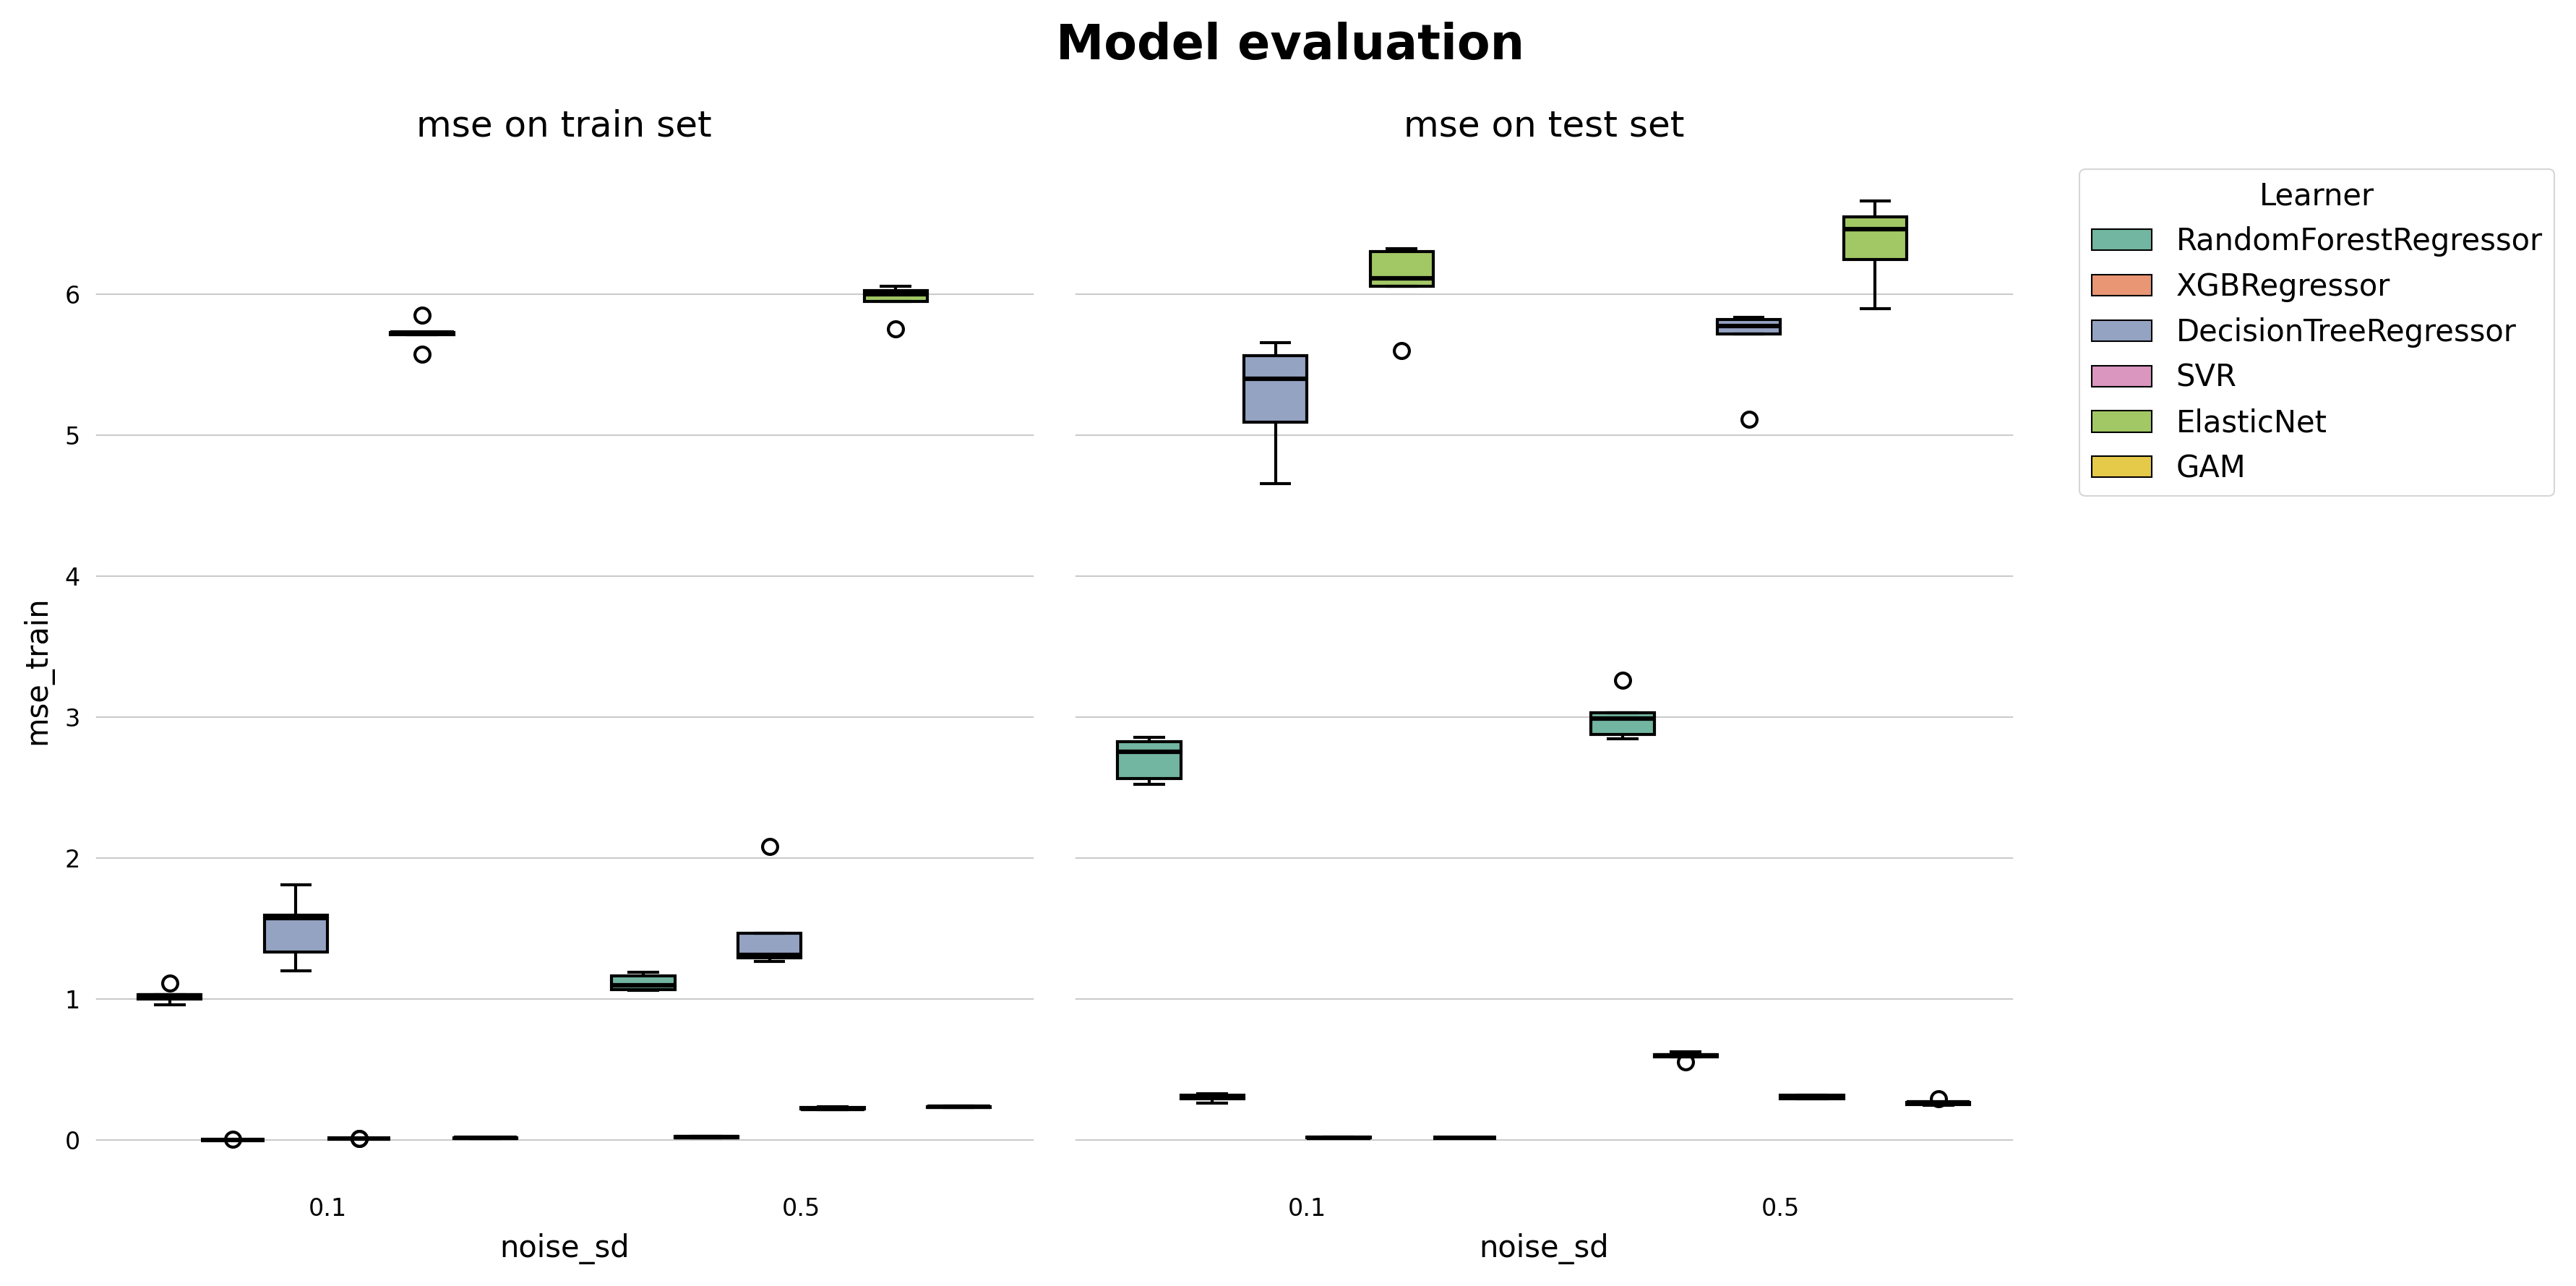

In [20]:
%matplotlib inline
boxplot_model_results(metric='mse', df=df);

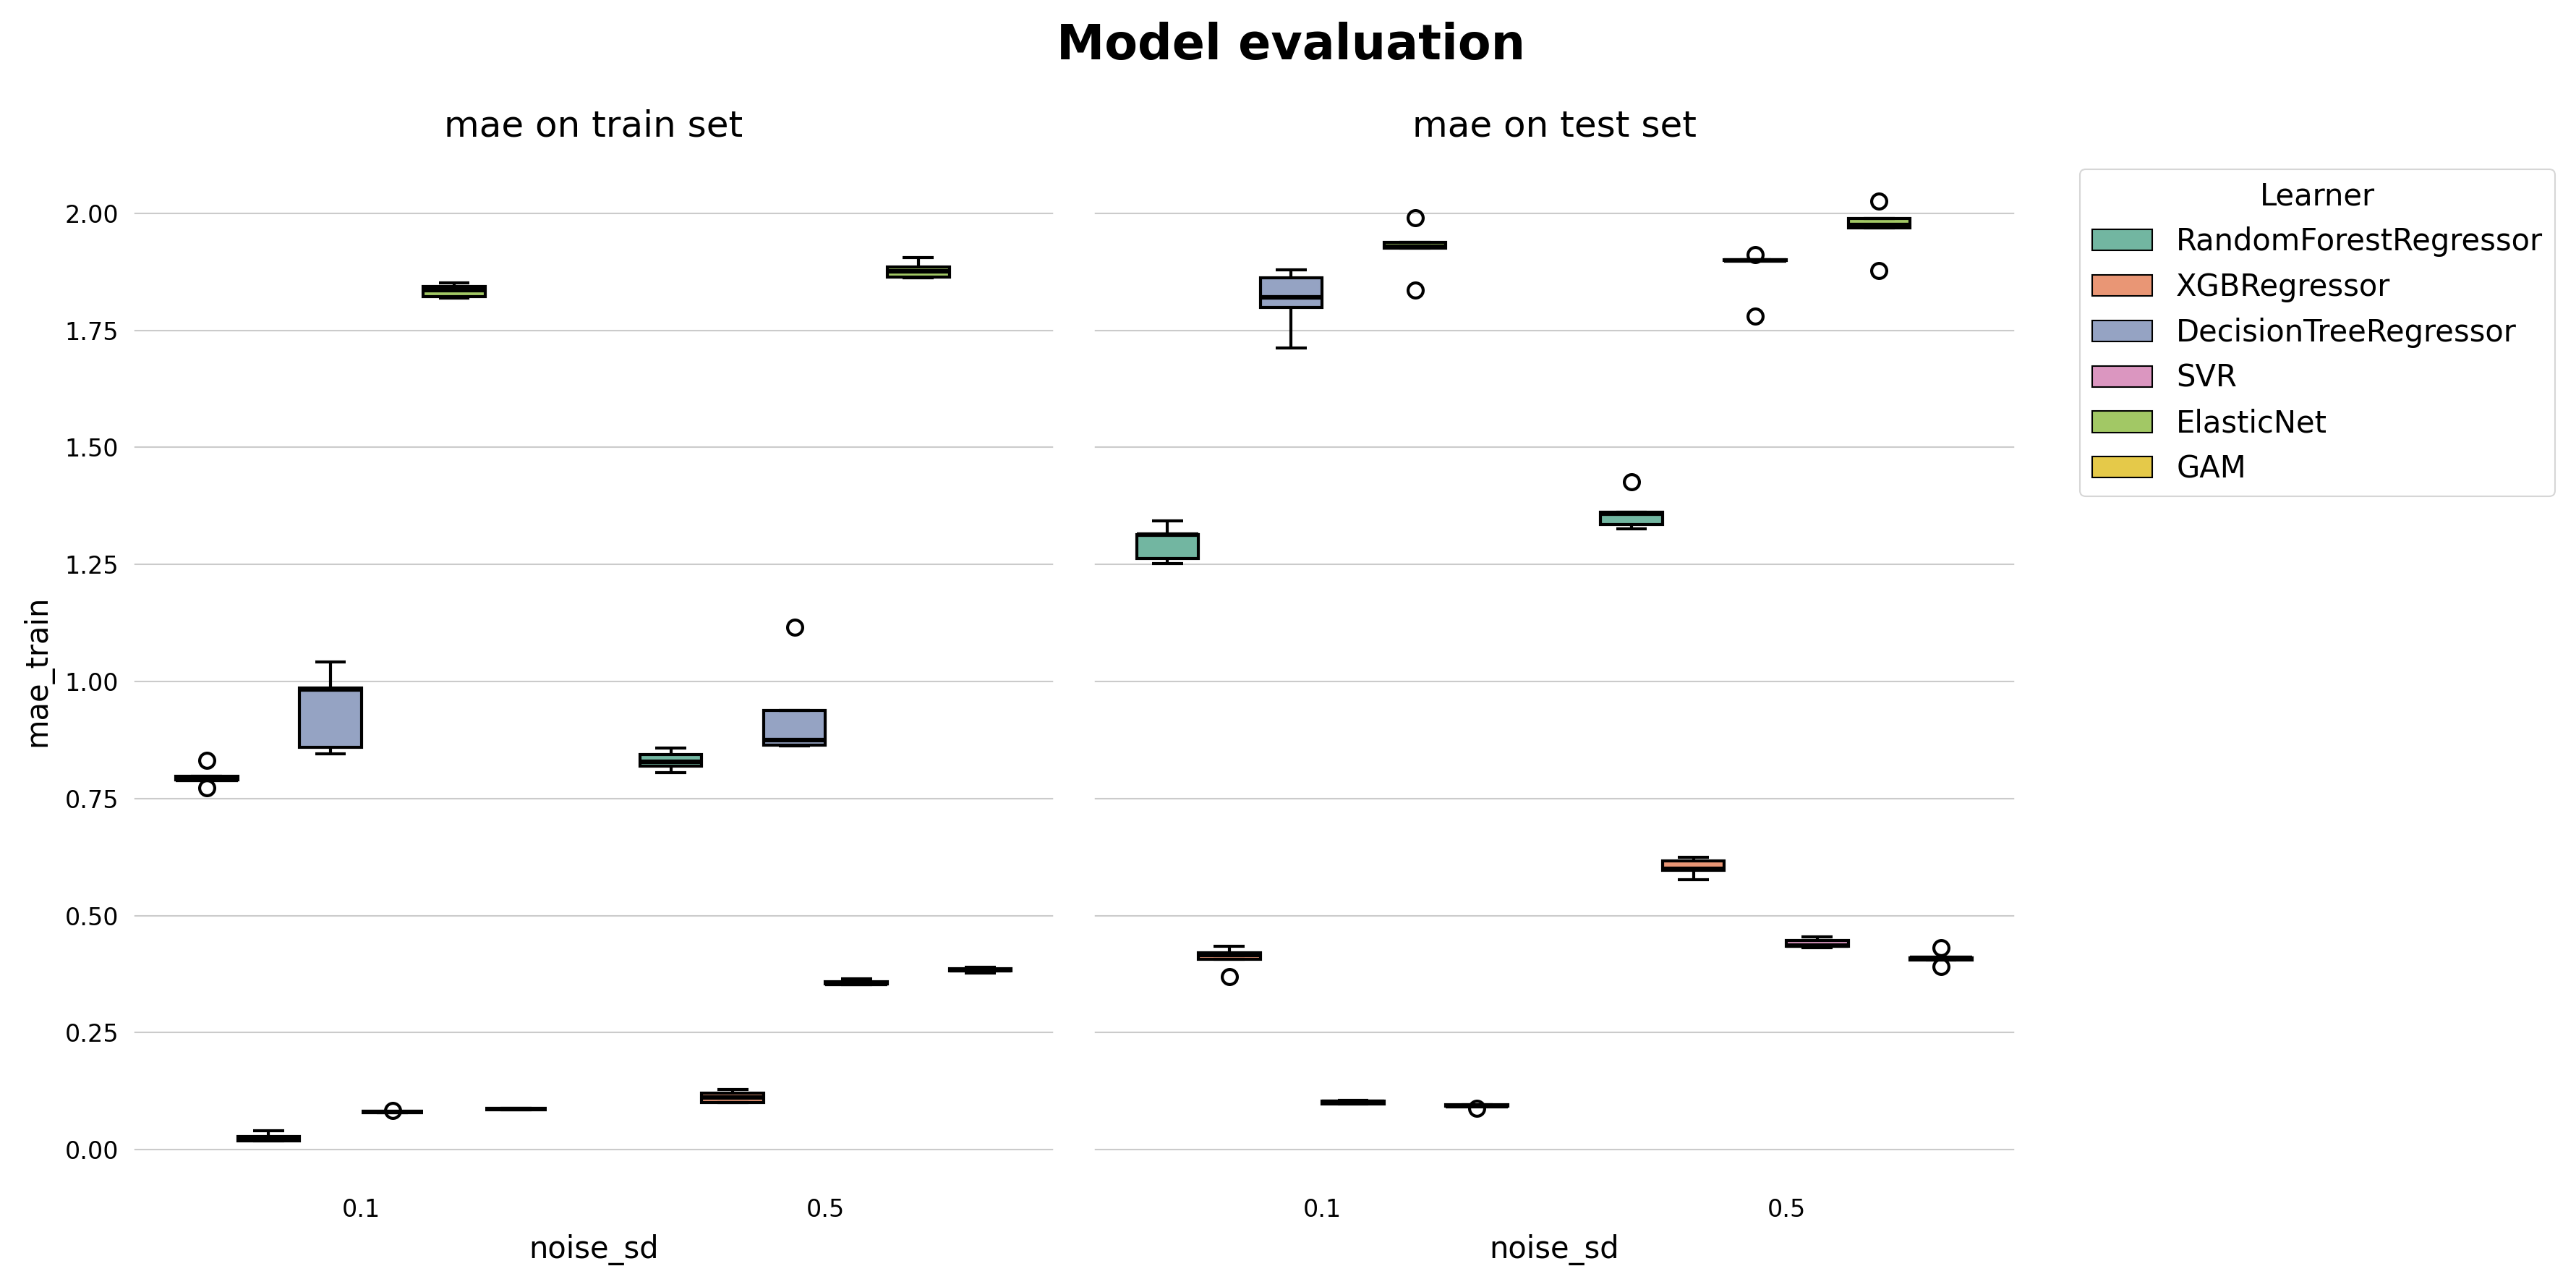

In [21]:
%matplotlib inline
boxplot_model_results(metric='mae', df=df);

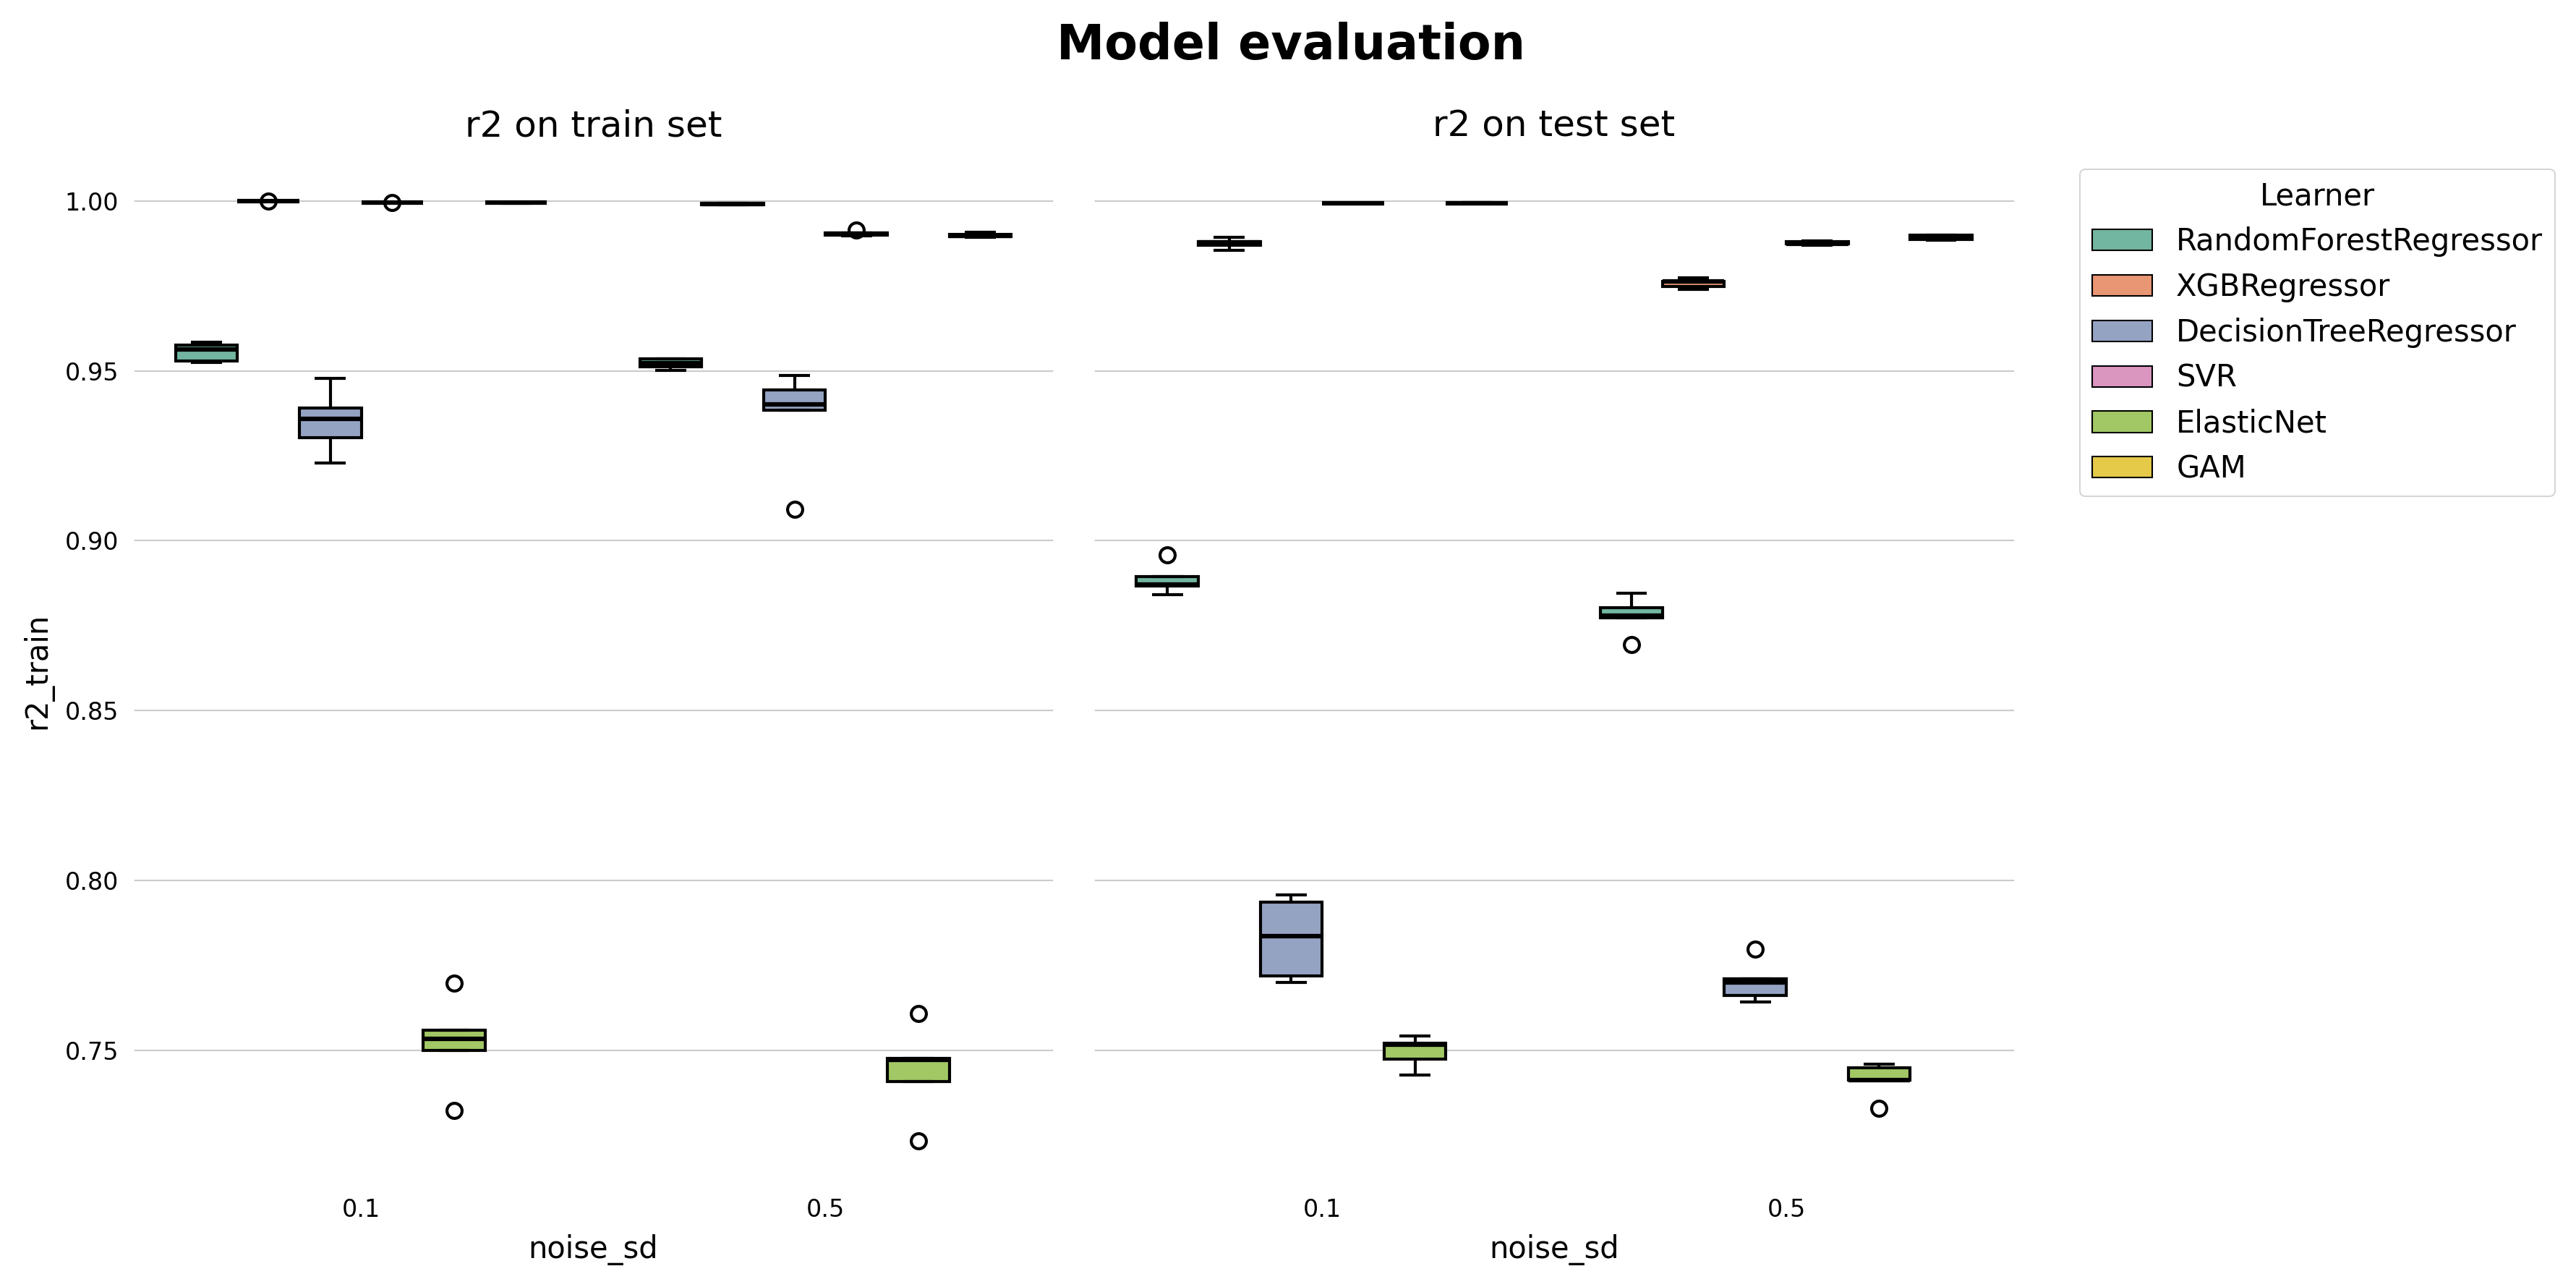

In [22]:
%matplotlib inline
boxplot_model_results(metric='r2', df=df);

- best models: XGBoost, SVM, GAM
- test errors only slightly worse than training errors (--> acceptable generalization)
- as expected smaller error for smaller noise in generated data

## Feature Effect Evaluation

In [24]:
from configparser import ConfigParser
from joblib import load
import pandas as pd
from IPython.display import Markdown as md

from feature_effect_empirical_analysis.plotting.plots import boxplot_feature_effect_results, plot_effect_comparison
from feature_effect_empirical_analysis.data_generation import generate_data, Groundtruth

In [25]:
config = ConfigParser()
config.read(config_file)

['../simulations/sim_all-models-5_theoretical_20240420/config_sim_all-models-5_theoretical_20240420.ini']

## PDP Results

### Error of Model PD compared to Groundtruth PD

In [27]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("pdp_results", f"sqlite:///{base_path + effects_results_storage}")
df

index                                   model_id                  model  \
0       0  RandomForestRegressor_20240420_1_1000_0.1  RandomForestRegressor   
1       0           XGBRegressor_20240420_1_1000_0.1           XGBRegressor   
2       0  DecisionTreeRegressor_20240420_1_1000_0.1  DecisionTreeRegressor   
3       0                    SVR_20240420_1_1000_0.1                    SVR   
4       0             ElasticNet_20240420_1_1000_0.1             ElasticNet   
5       0                    GAM_20240420_1_1000_0.1                    GAM   
6       0  RandomForestRegressor_20240420_1_1000_0.5  RandomForestRegressor   
7       0           XGBRegressor_20240420_1_1000_0.5           XGBRegressor   
8       0  DecisionTreeRegressor_20240420_1_1000_0.5  DecisionTreeRegressor   
9       0                    SVR_20240420_1_1000_0.5                    SVR   
10      0             ElasticNet_20240420_1_1000_0.5             ElasticNet   
11      0                    GAM_20240420_1_1000_0.5                    GAM   
12      0  RandomForestRegressor_20240420_2_1000_0.1  RandomForestRegressor   
13      0           XGBRegressor_20240420_2_1000_0.1           XGBRegressor   
14      0  DecisionTreeRegressor_20240420_2_1000_0.1  DecisionTreeRegressor   
15      0                    SVR_20240420_2_1000_0.1                    SVR   
16      0             ElasticNet_20240420_2_1000_0.1             ElasticNet   
17      0                    GAM_20240420_2_1000_0.1                    GAM   
18      0  RandomForestRegressor_20240420_2_1000_0.5  RandomForestRegressor   
19      0           XGBRegressor_20240420_2_1000_0.5           XGBRegressor   
20      0  DecisionTreeRegressor_20240421_2_1000_0.5  DecisionTreeRegressor   
21      0                    SVR_20240421_2_1000_0.5                    SVR   
22      0             ElasticNet_20240421_2_1000_0.5             ElasticNet   
23      0                    GAM_20240421_2_1000_0.5                    GAM   
24      0  RandomForestRegressor_20240421_3_1000_0.1  RandomForestRegressor   
25      0           XGBRegressor_20240421_3_1000_0.1           XGBRegressor   
26      0  DecisionTreeRegressor_20240421_3_1000_0.1  DecisionTreeRegressor   
27      0                    SVR_20240421_3_1000_0.1                    SVR   
28      0             ElasticNet_20240421_3_1000_0.1             ElasticNet   
29      0                    GAM_20240421_3_1000_0.1                    GAM   
30      0  RandomForestRegressor_20240421_3_1000_0.5  RandomForestRegressor   
31      0           XGBRegressor_20240421_3_1000_0.5           XGBRegressor   
32      0  DecisionTreeRegressor_20240421_3_1000_0.5  DecisionTreeRegressor   
33      0                    SVR_20240421_3_1000_0.5                    SVR   
34      0             ElasticNet_20240421_3_1000_0.5             ElasticNet   
35      0                    GAM_20240421_3_1000_0.5                    GAM   
36      0  RandomForestRegressor_20240421_4_1000_0.1  RandomForestRegressor   
37      0           XGBRegressor_20240421_4_1000_0.1           XGBRegressor   
38      0  DecisionTreeRegressor_20240421_4_1000_0.1  DecisionTreeRegressor   
39      0                    SVR_20240421_4_1000_0.1                    SVR   
40      0             ElasticNet_20240421_4_1000_0.1             ElasticNet   
41      0                    GAM_20240421_4_1000_0.1                    GAM   
42      0  RandomForestRegressor_20240421_4_1000_0.5  RandomForestRegressor   
43      0           XGBRegressor_20240421_4_1000_0.5           XGBRegressor   
44      0  DecisionTreeRegressor_20240421_4_1000_0.5  DecisionTreeRegressor   
45      0                    SVR_20240421_4_1000_0.5                    SVR   
46      0             ElasticNet_20240421_4_1000_0.5             ElasticNet   
47      0                    GAM_20240421_4_1000_0.5                    GAM   
48      0  RandomForestRegressor_20240421_5_1000_0.1  RandomForestRegressor   
49      0           XGBRegressor_20240421_5_1000_0.1  

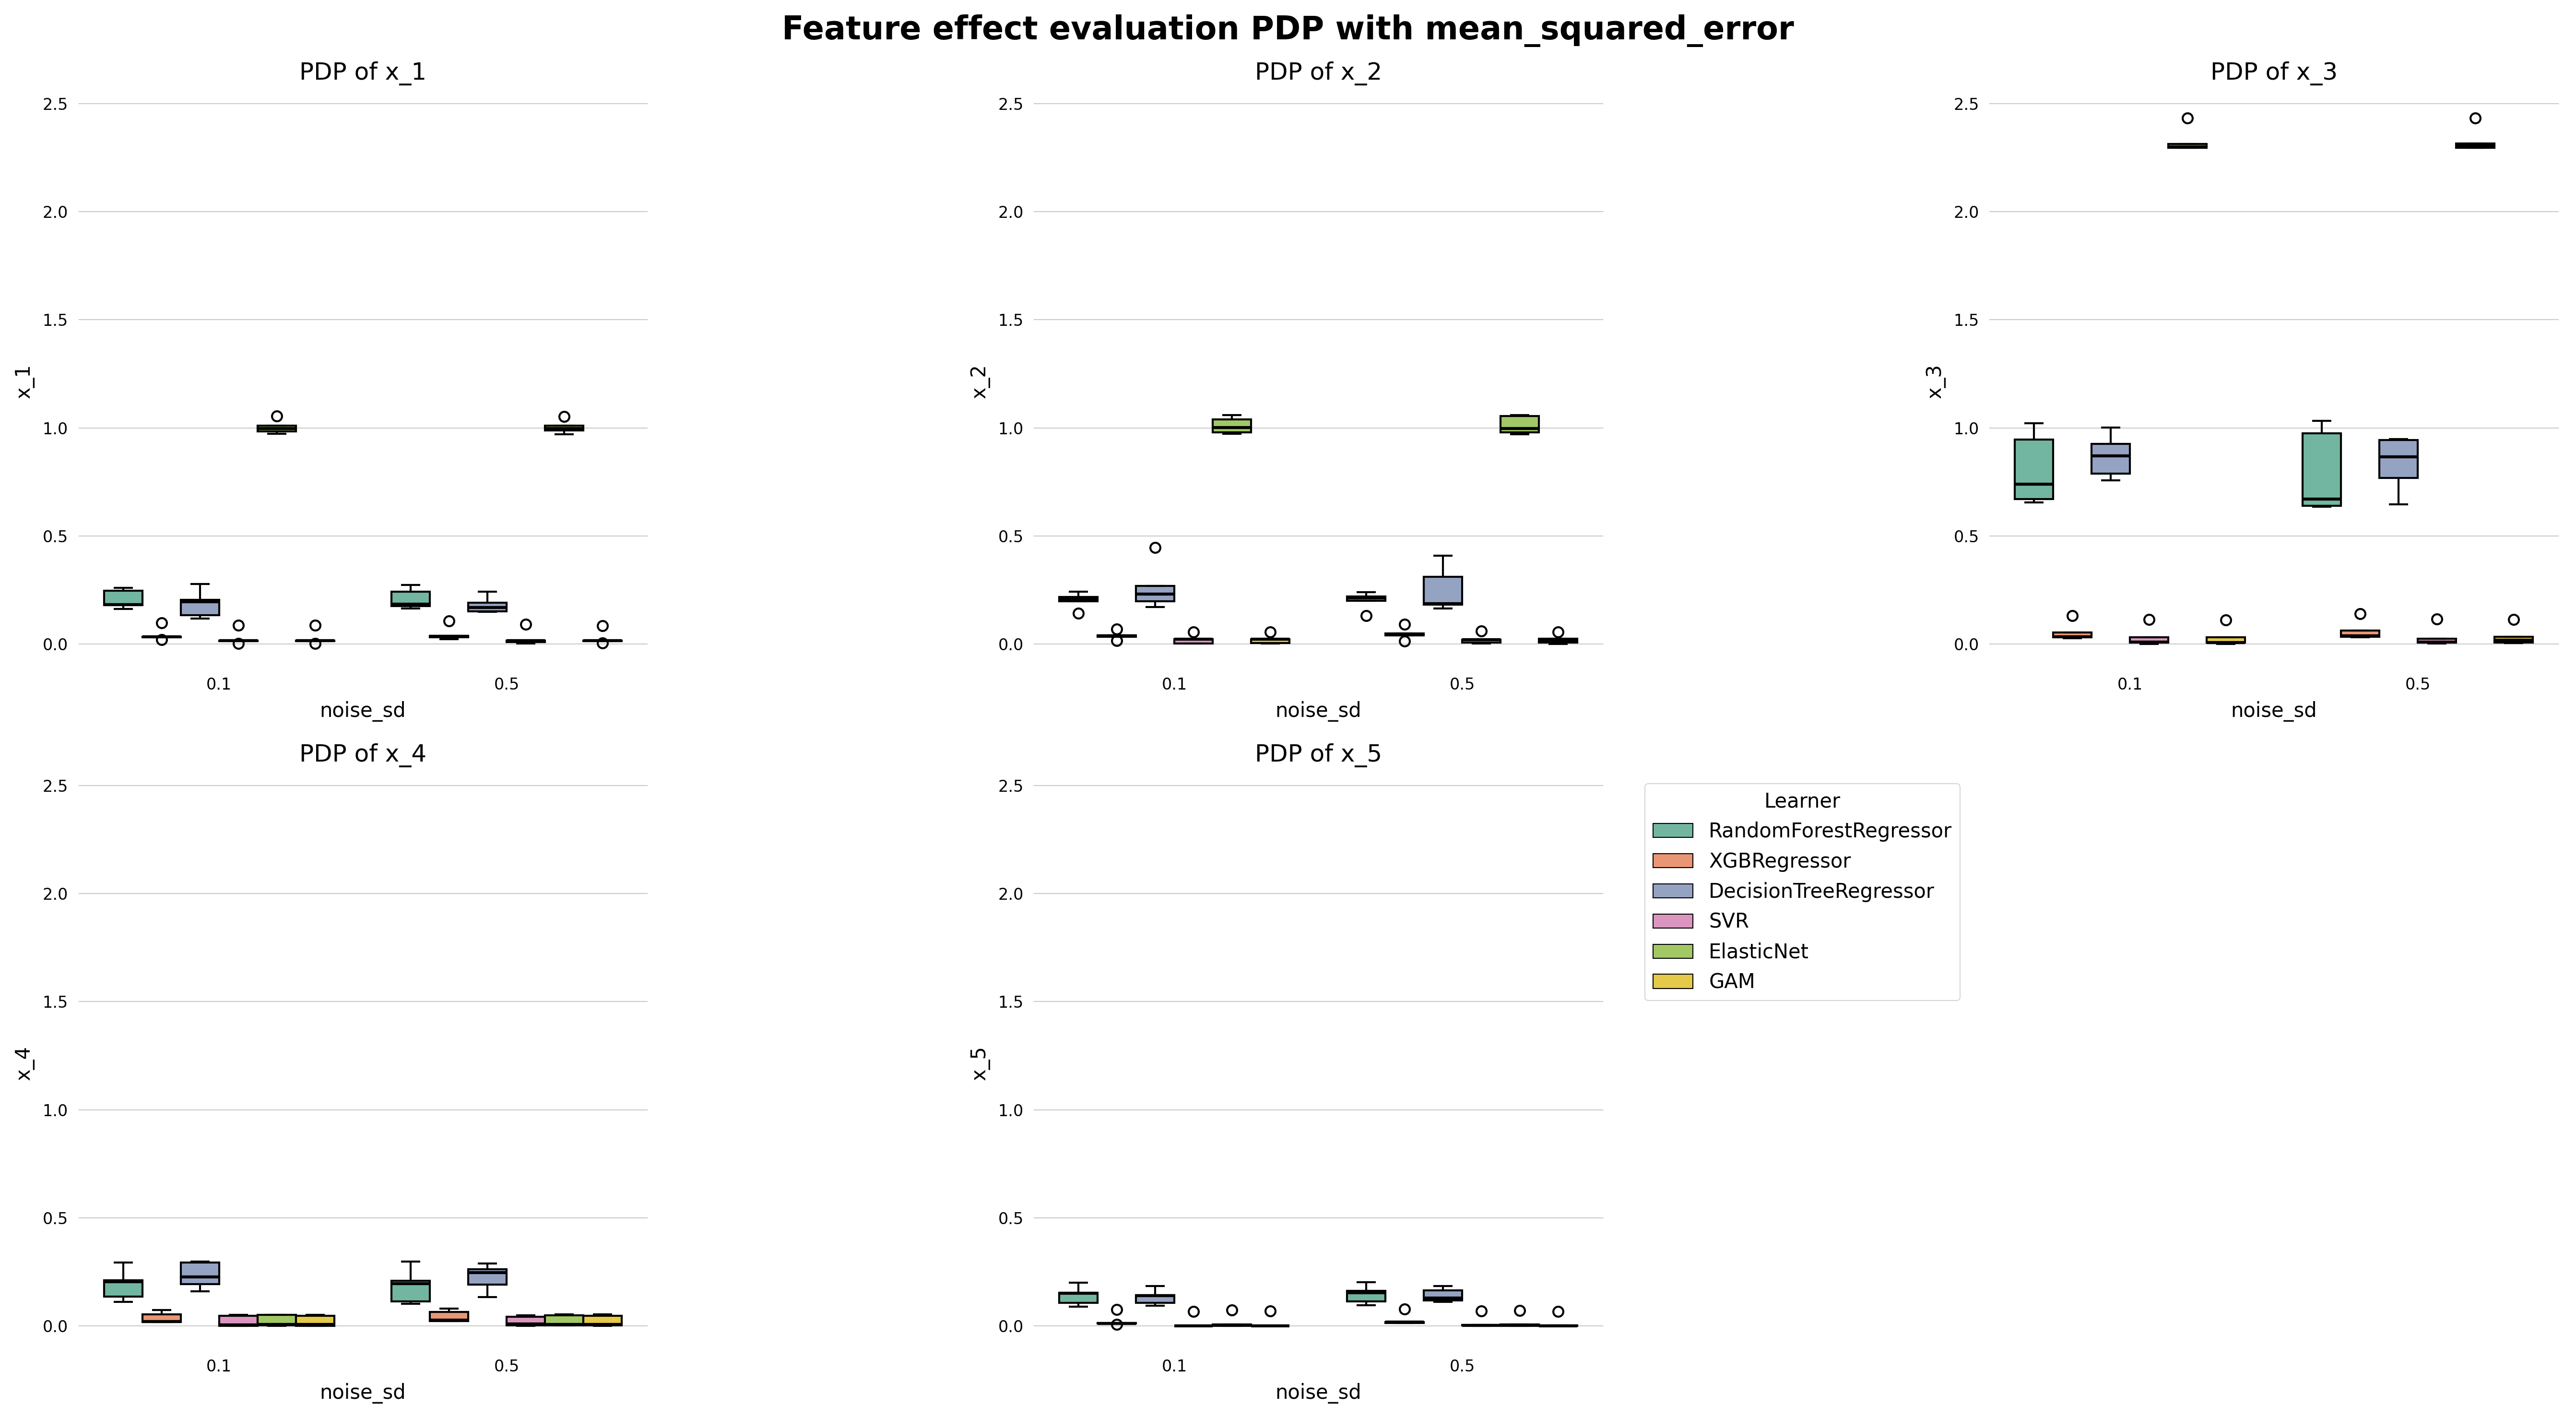

In [28]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4", "x_5"], df=df, effect_type="PDP");

### PDP example visualizations

(simulation no. 1 with n_train=1000 and noise_sd=0.1)

In [30]:
data_str = "20240420"

# set up of example
sim_no = 1
n_train = 1000
noise_sd = 0.1

In [33]:
# recreate dataset
X_train, y_train, X_test, y_test = generate_data(1000, 1000, 0.1, seed=1)
# init groundtruth
groundtruth = Groundtruth()
# load models
rf = load(f'{base_path}models/RandomForestRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
xgb = load(f'{base_path}models/XGBRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
tree = load(f'{base_path}models/DecisionTreeRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
svm = load(f'{base_path}models/SVR_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
elasticnet = load(f'{base_path}models/ElasticNet_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
gam = load(f'{base_path}models/GAM_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')

c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


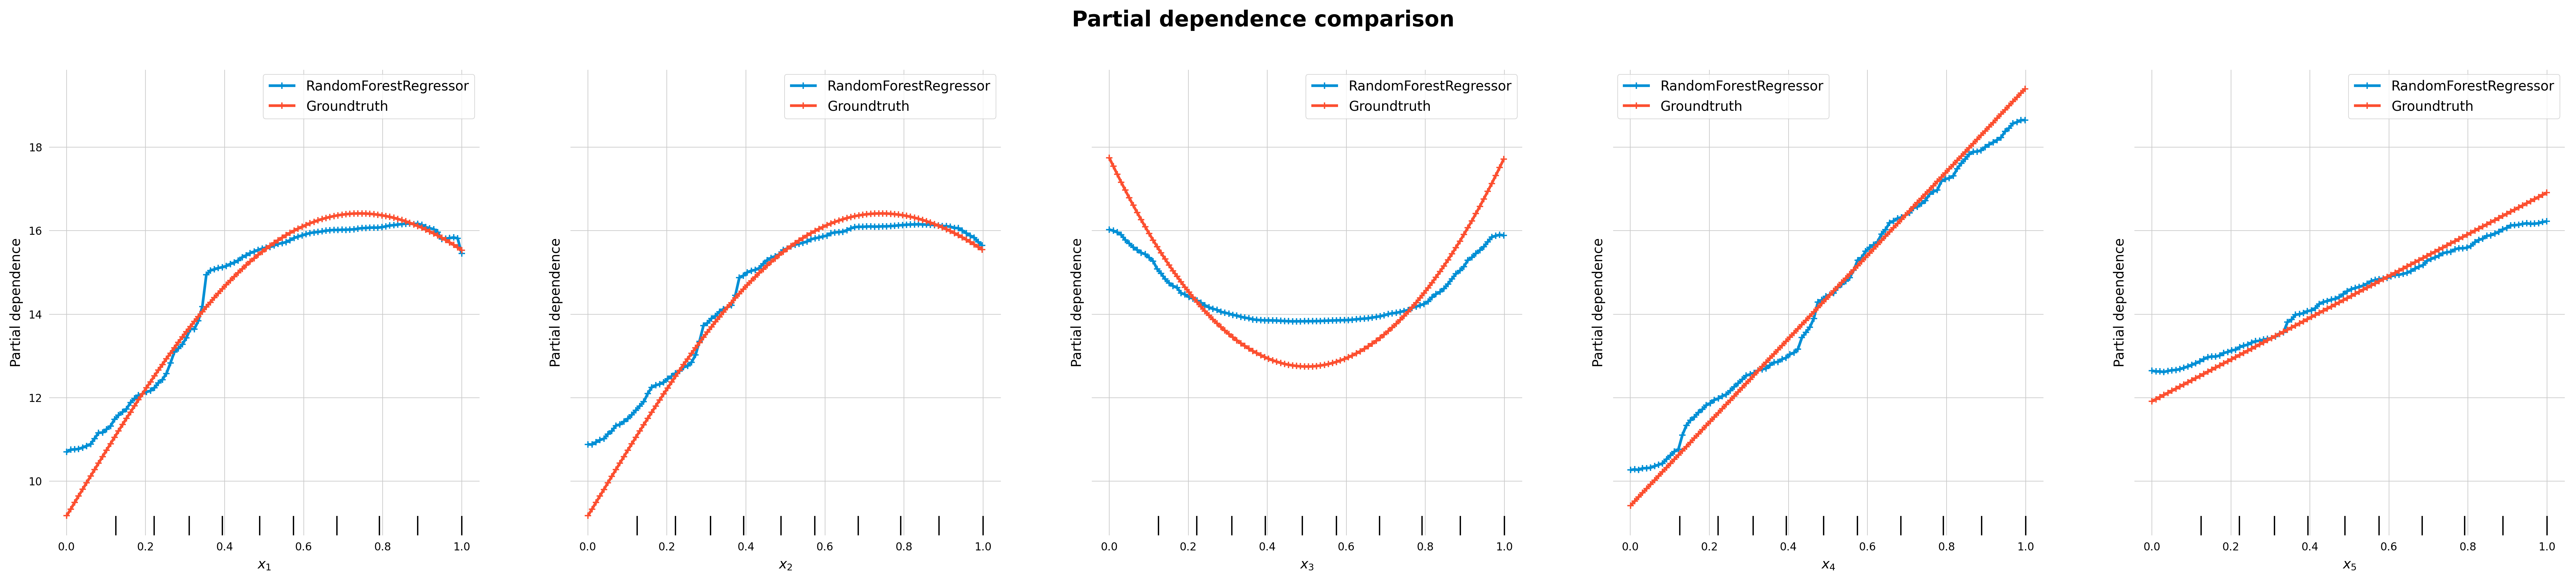

In [35]:
%matplotlib inline
plot_effect_comparison(rf, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

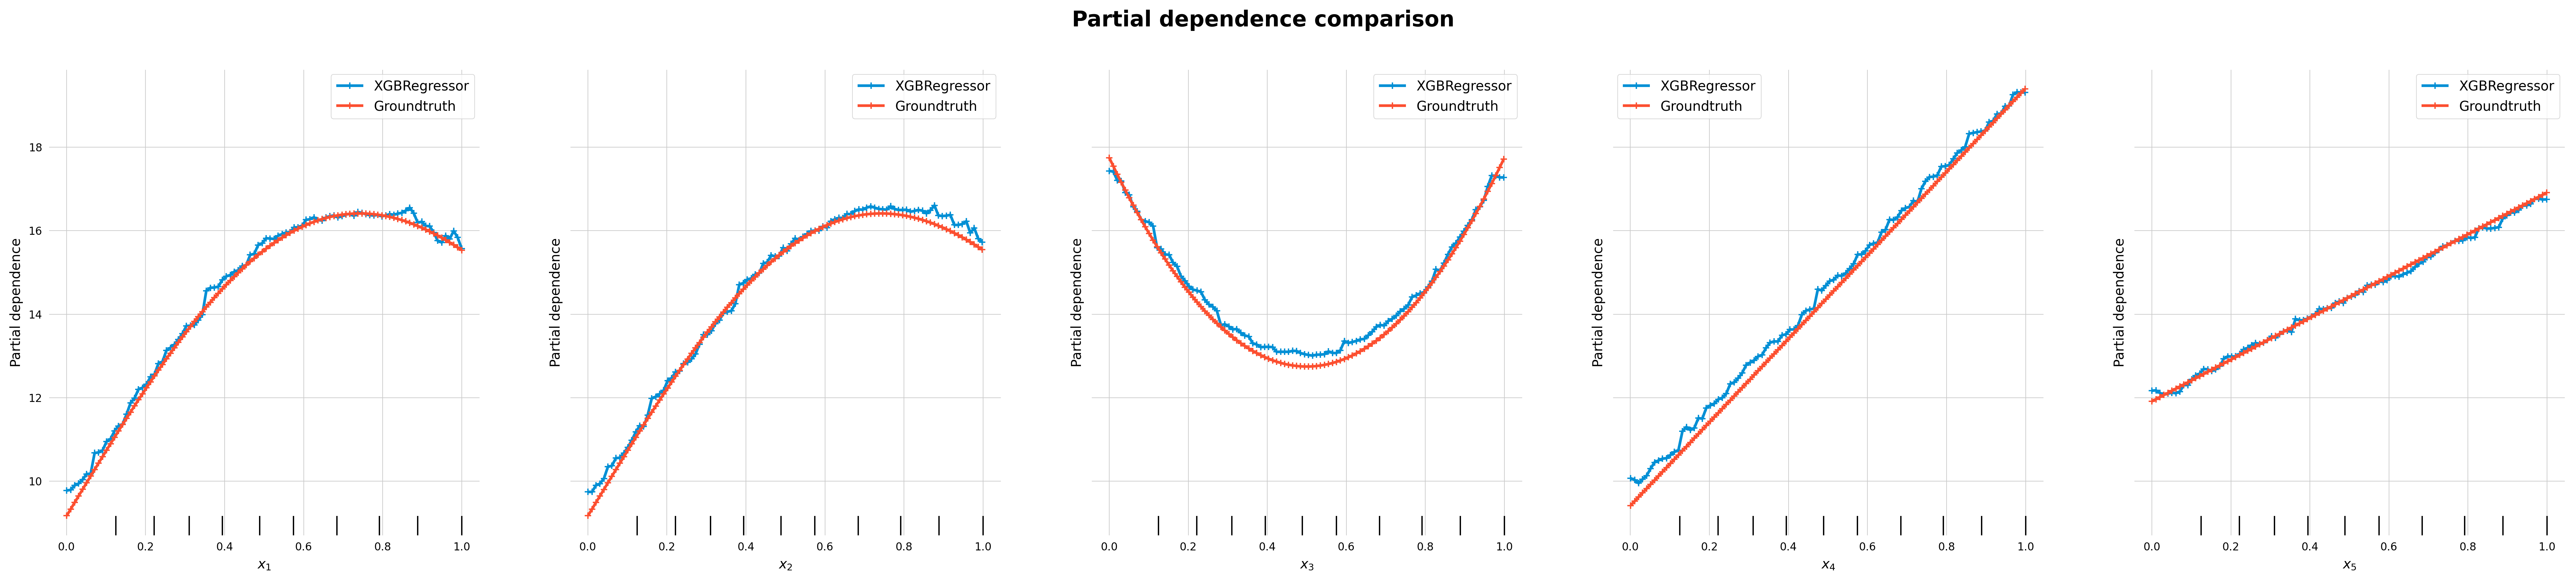

In [36]:
%matplotlib inline
plot_effect_comparison(xgb, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

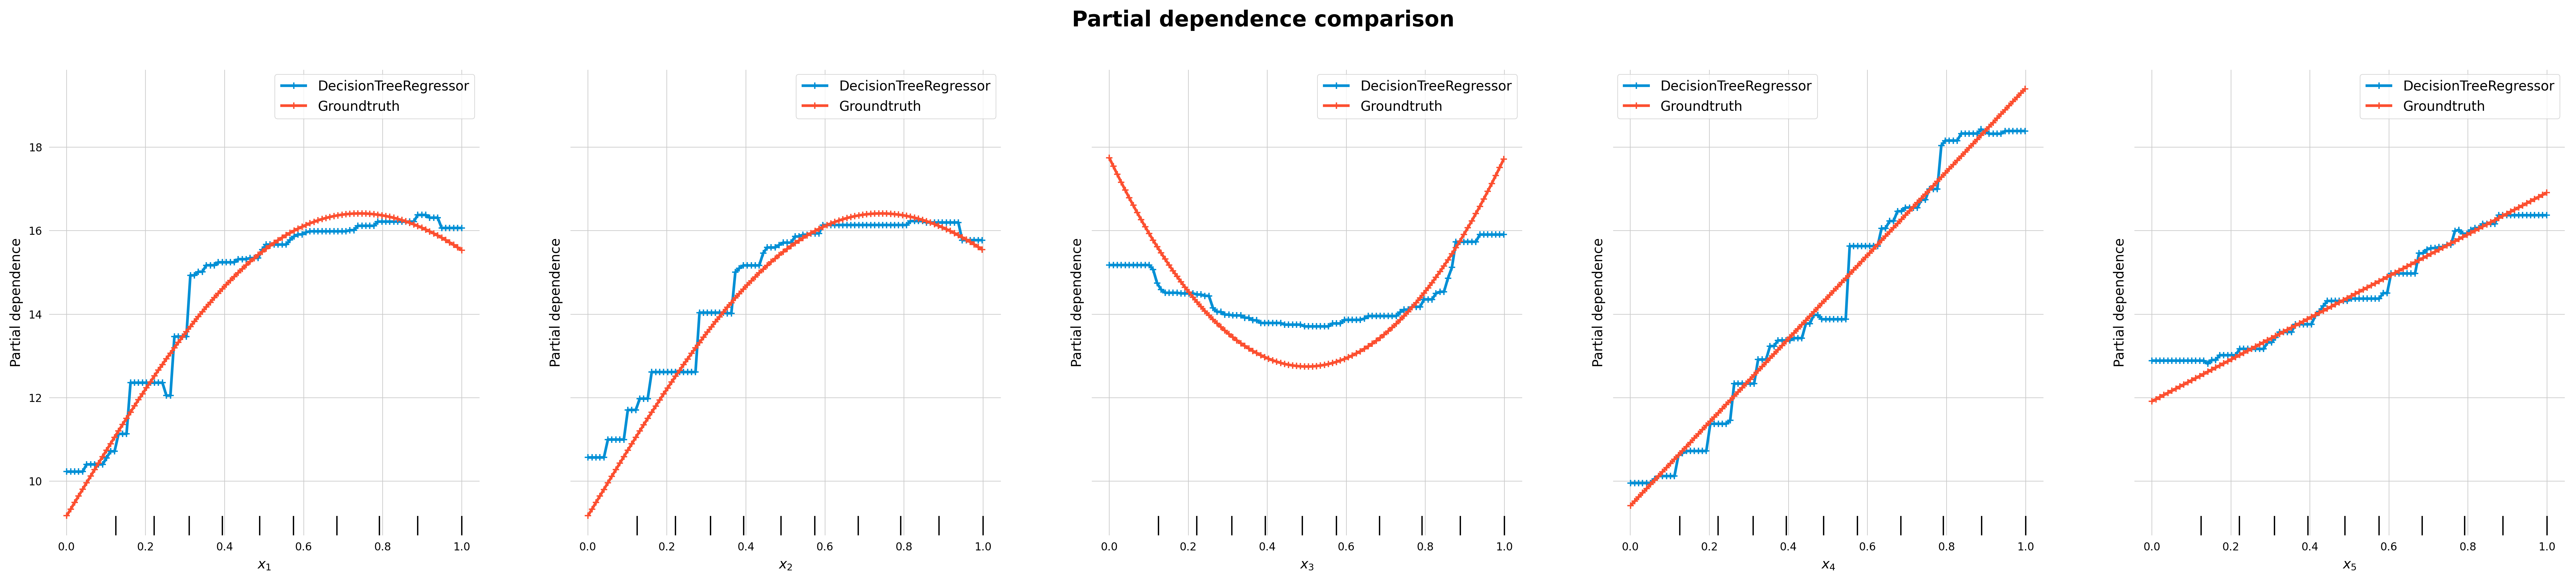

In [37]:
%matplotlib inline
plot_effect_comparison(tree, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

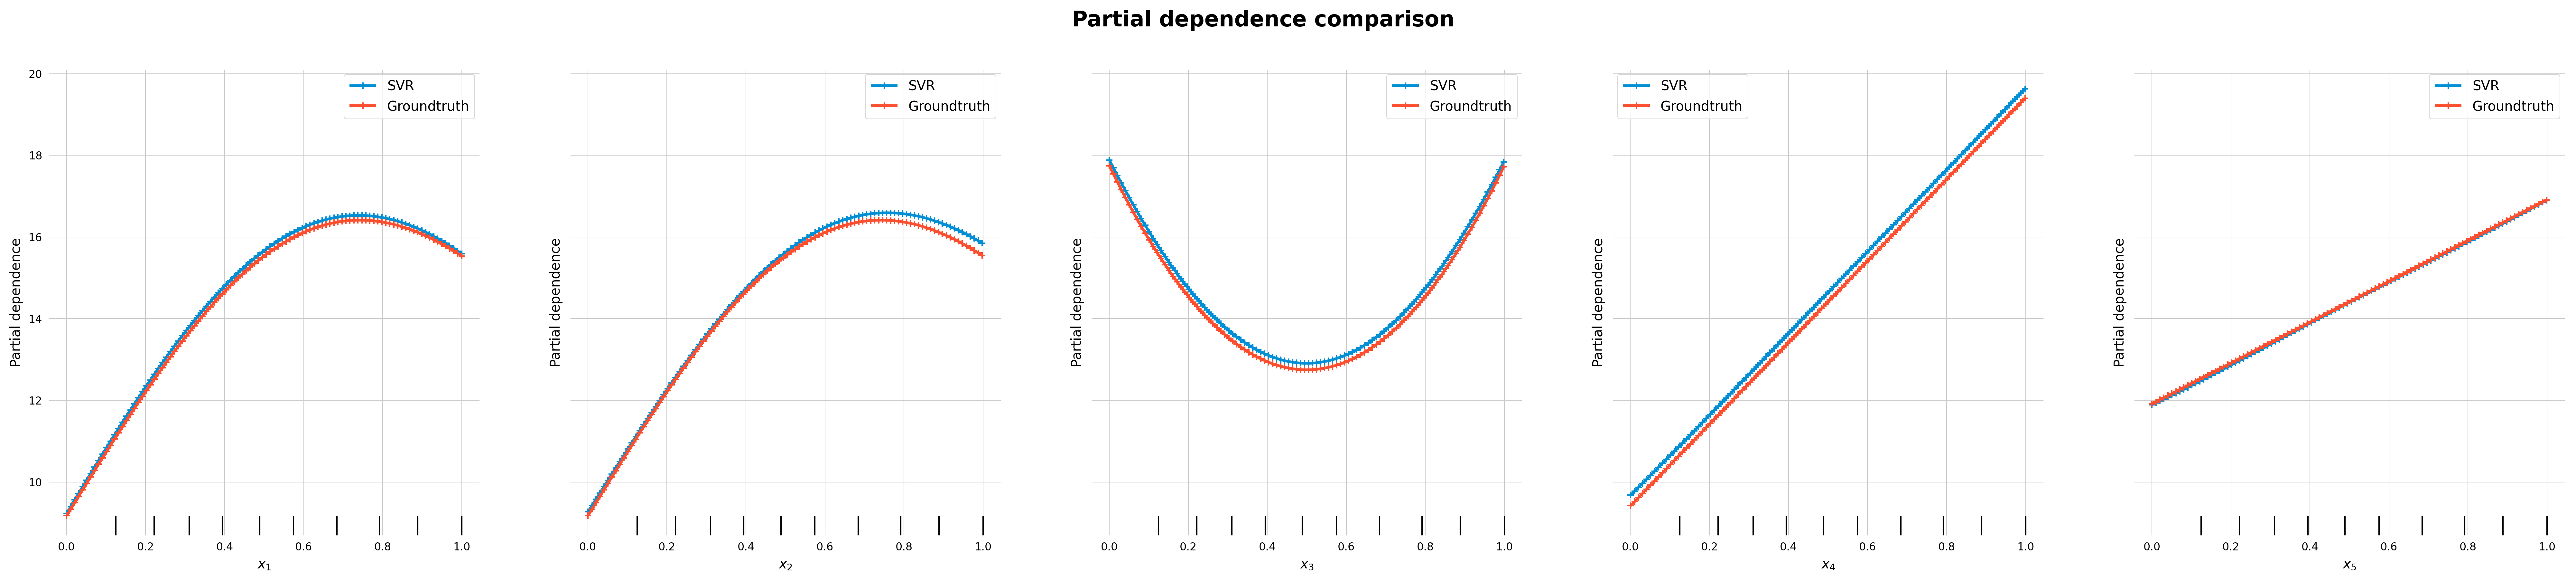

In [38]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

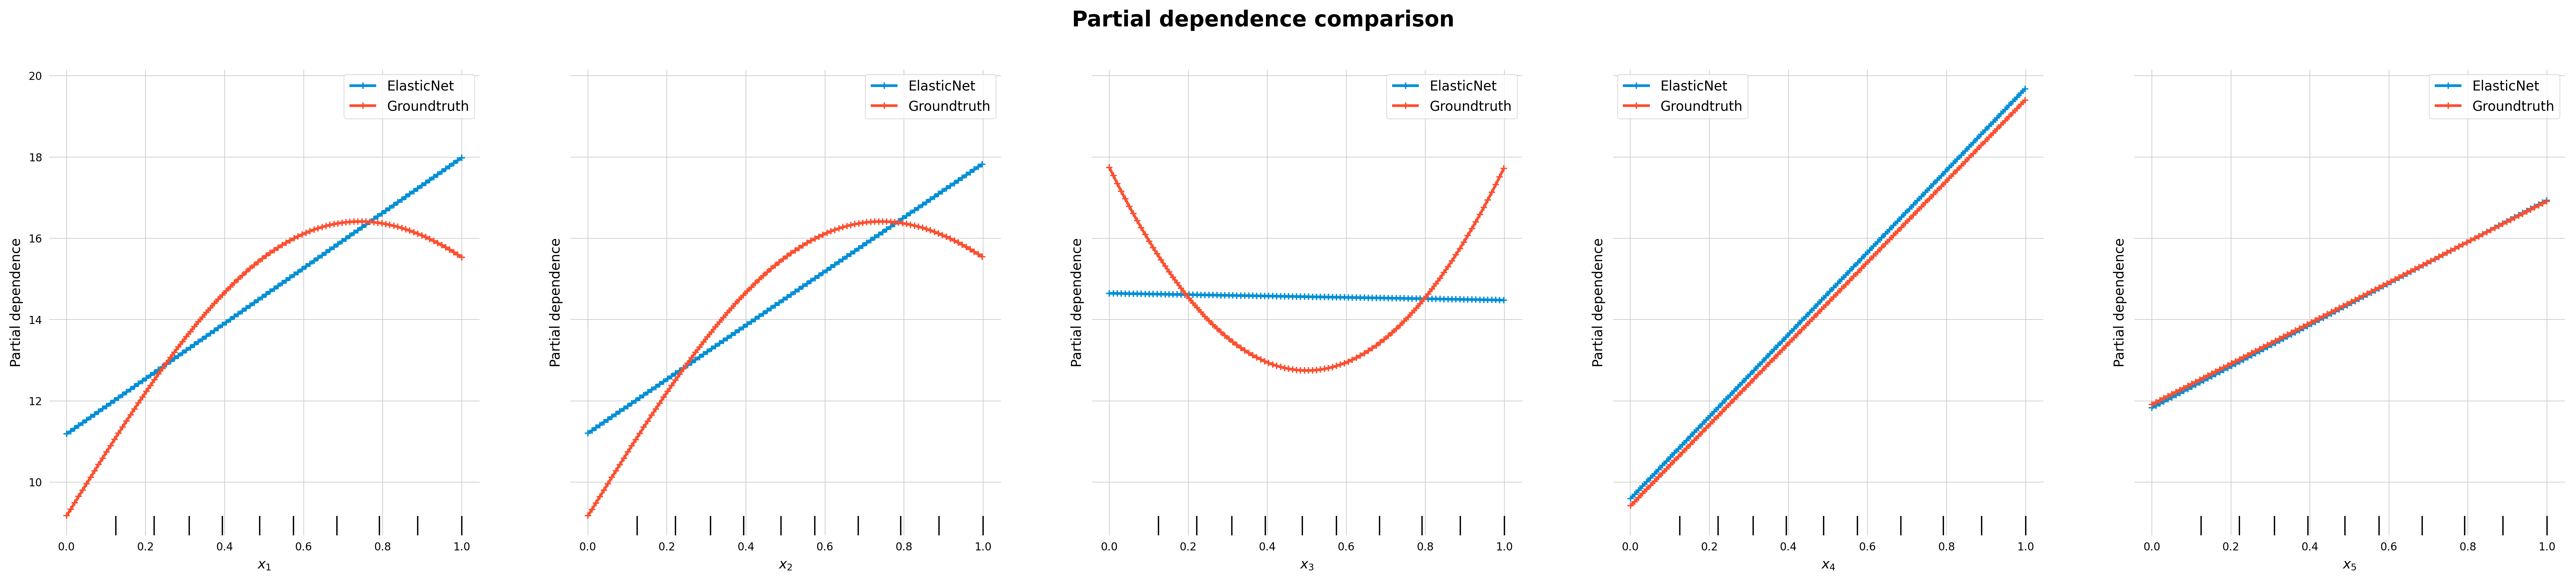

In [39]:
%matplotlib inline
plot_effect_comparison(elasticnet, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

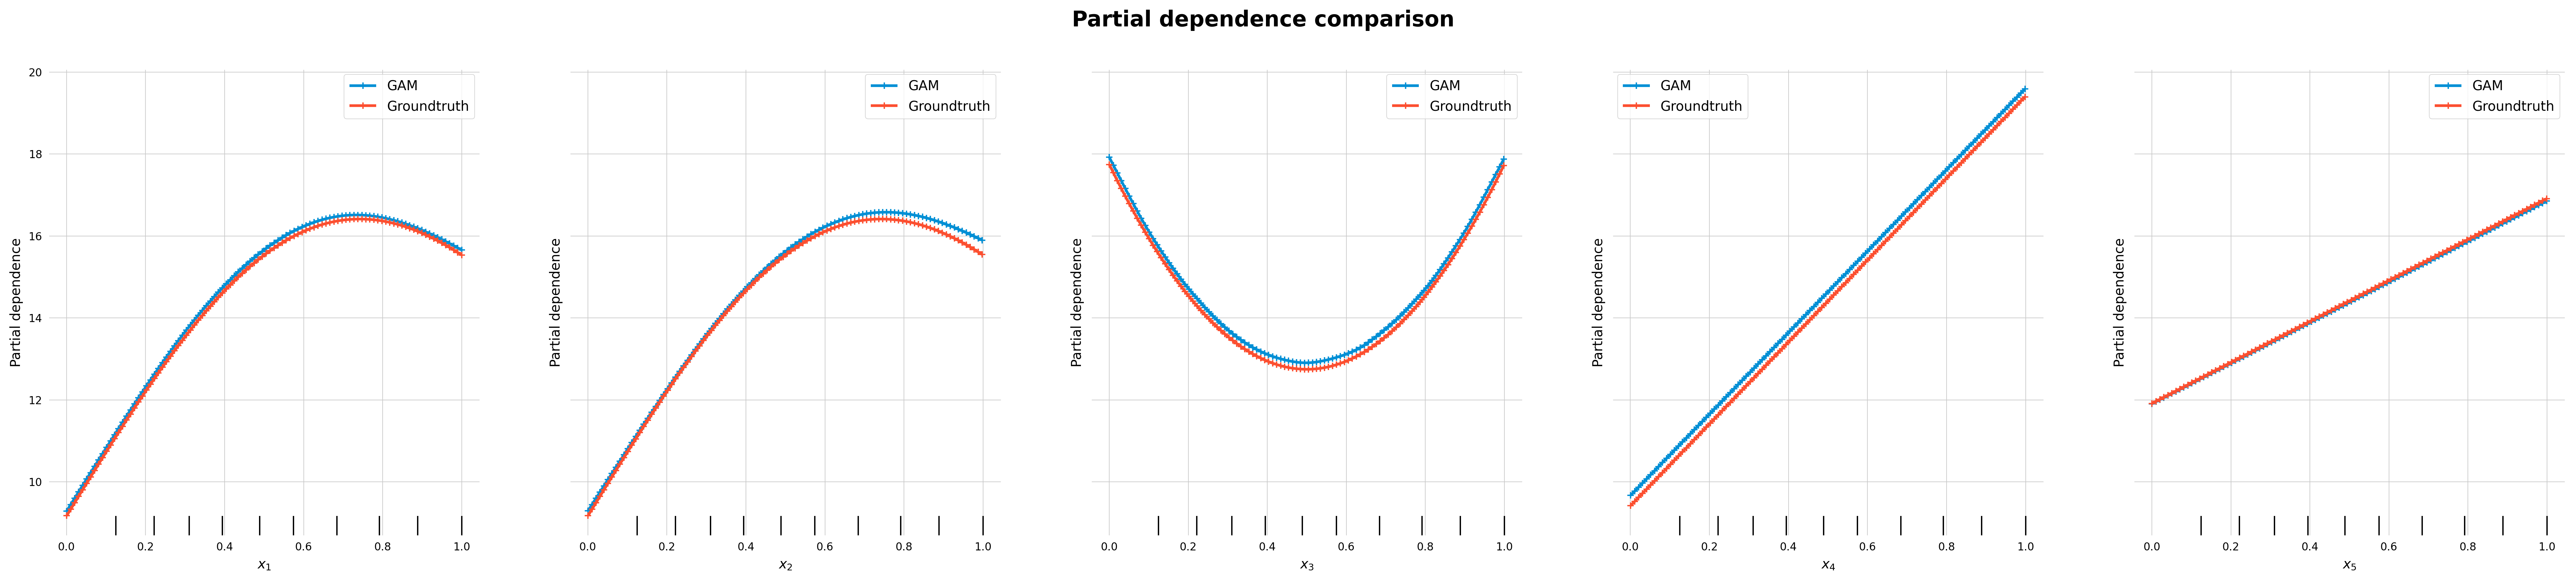

In [40]:
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

**Interesting observation:**

Visible difference between the true (theoretical) partial dependence and the partial dependence estimated on the groundtruth

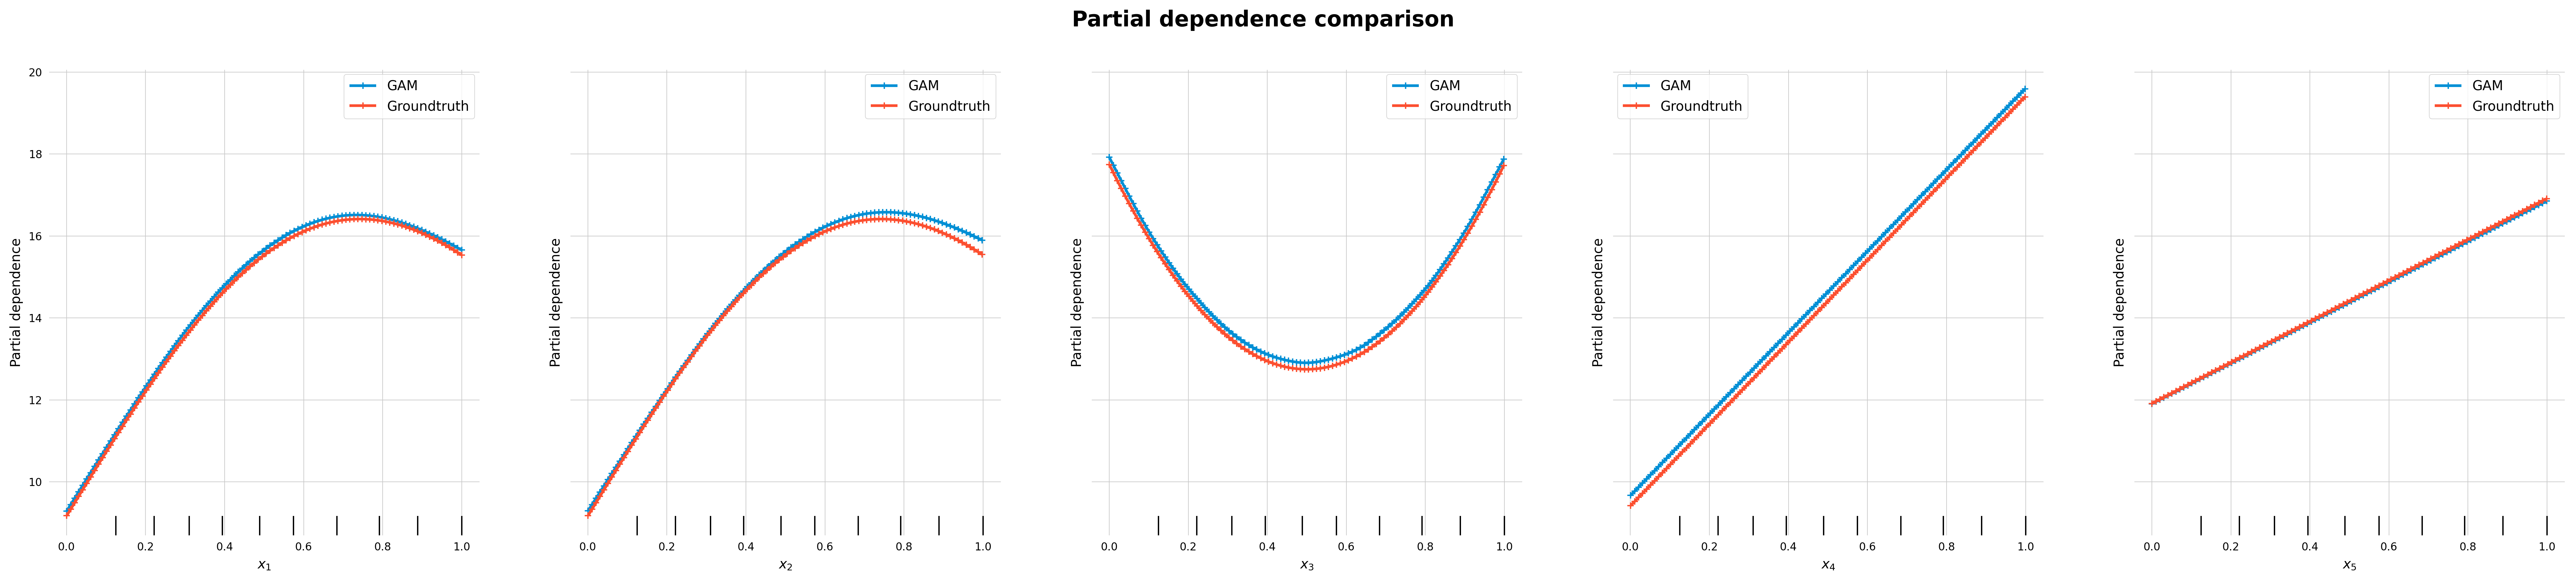

In [41]:
# GAM PD vs. Theoretical Groundtruth PD
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

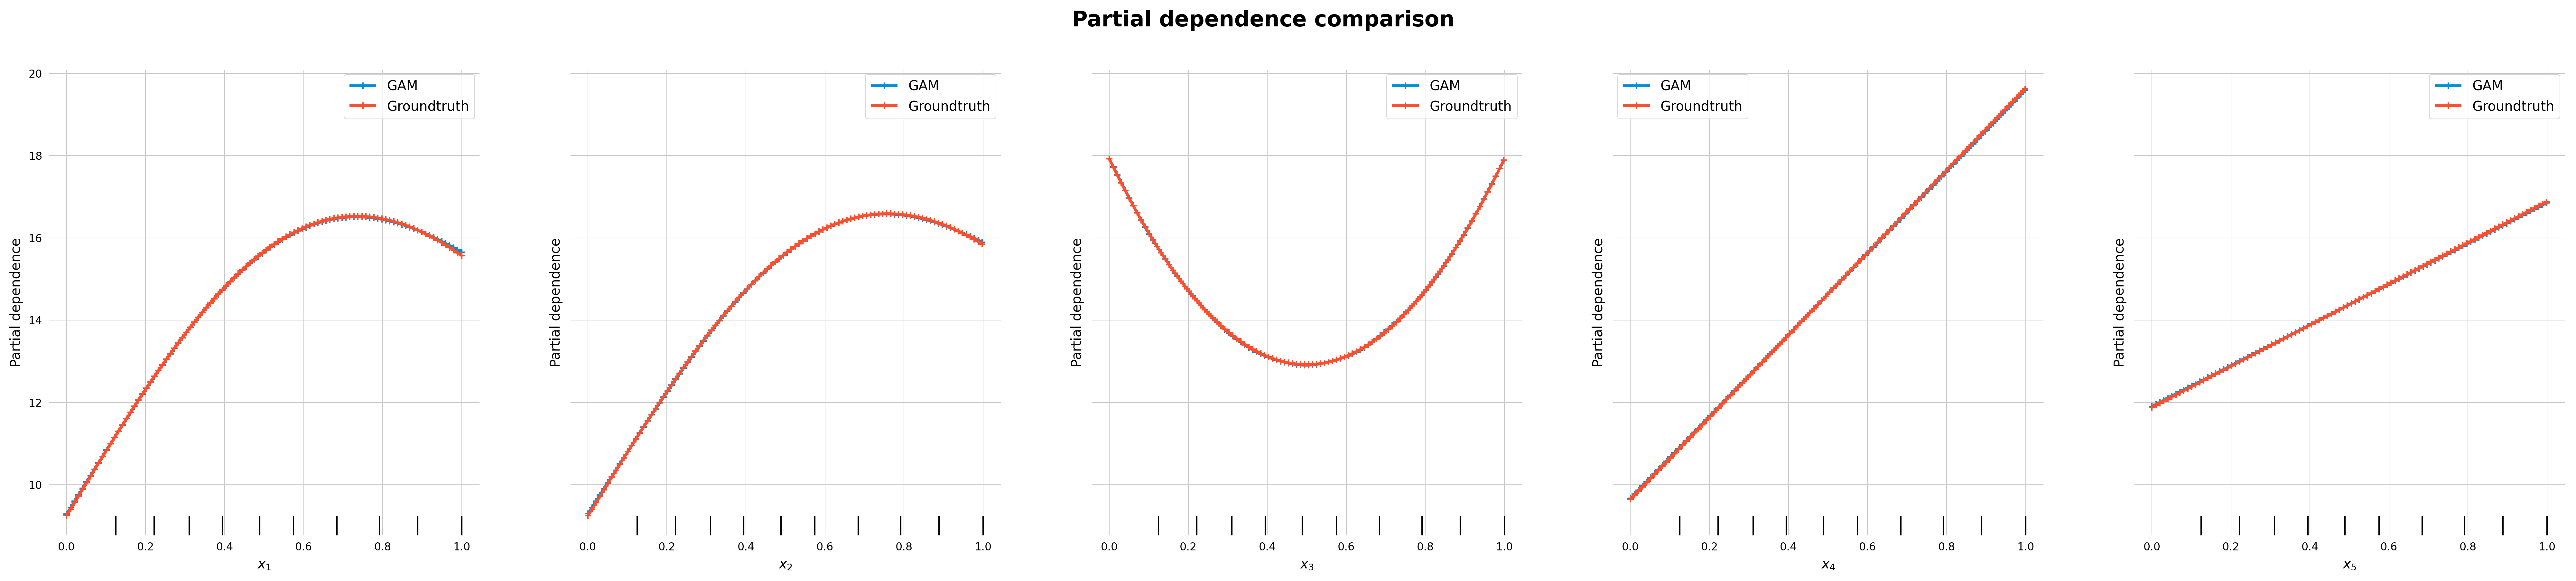

In [42]:
# GAM vs. Empirical Groundtruth PD
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="empirical", config=config);

## ALE

<b style="color: red">The results for ALE are compared to an estimated/empirically calculated groundtruth feature effect, i.e. by applying the usual ALE estimation directly on the groundtruth function.</b>

### Error of Model-ALE compared to groundtruth-ALE

In [43]:
# use results of a different study (where feature effects of groundtruth were estimated empirically)
data_str = "20240420"
base_path2 = "../../simulations/sim_all-models-5_20240413/"
config2 = ConfigParser()
config2.read(f"{base_path2}/config_sim_all-models-5_20240413")

['../simulations/sim_all-models-5_20240413//config_sim_all-models-5_20240413']

In [44]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("ale_results", f"sqlite:///{base_path2 + effects_results_storage}")
df

index                                   model_id                  model  \
0       0  RandomForestRegressor_20240413_1_1000_0.1  RandomForestRegressor   
1       0           XGBRegressor_20240413_1_1000_0.1           XGBRegressor   
2       0  DecisionTreeRegressor_20240413_1_1000_0.1  DecisionTreeRegressor   
3       0                    SVR_20240413_1_1000_0.1                    SVR   
4       0             ElasticNet_20240413_1_1000_0.1             ElasticNet   
5       0                    GAM_20240413_1_1000_0.1                    GAM   
6       0  RandomForestRegressor_20240413_1_1000_0.5  RandomForestRegressor   
7       0           XGBRegressor_20240413_1_1000_0.5           XGBRegressor   
8       0  DecisionTreeRegressor_20240413_1_1000_0.5  DecisionTreeRegressor   
9       0                    SVR_20240413_1_1000_0.5                    SVR   
10      0             ElasticNet_20240413_1_1000_0.5             ElasticNet   
11      0                    GAM_20240413_1_1000_0.5                    GAM   
12      0  RandomForestRegressor_20240413_2_1000_0.1  RandomForestRegressor   
13      0           XGBRegressor_20240413_2_1000_0.1           XGBRegressor   
14      0  DecisionTreeRegressor_20240413_2_1000_0.1  DecisionTreeRegressor   
15      0                    SVR_20240413_2_1000_0.1                    SVR   
16      0             ElasticNet_20240413_2_1000_0.1             ElasticNet   
17      0                    GAM_20240413_2_1000_0.1                    GAM   
18      0  RandomForestRegressor_20240413_2_1000_0.5  RandomForestRegressor   
19      0           XGBRegressor_20240413_2_1000_0.5           XGBRegressor   
20      0  DecisionTreeRegressor_20240413_2_1000_0.5  DecisionTreeRegressor   
21      0                    SVR_20240413_2_1000_0.5                    SVR   
22      0             ElasticNet_20240413_2_1000_0.5             ElasticNet   
23      0                    GAM_20240413_2_1000_0.5                    GAM   
24      0  RandomForestRegressor_20240413_3_1000_0.1  RandomForestRegressor   
25      0           XGBRegressor_20240413_3_1000_0.1           XGBRegressor   
26      0  DecisionTreeRegressor_20240413_3_1000_0.1  DecisionTreeRegressor   
27      0                    SVR_20240413_3_1000_0.1                    SVR   
28      0             ElasticNet_20240413_3_1000_0.1             ElasticNet   
29      0                    GAM_20240413_3_1000_0.1                    GAM   
30      0  RandomForestRegressor_20240413_3_1000_0.5  RandomForestRegressor   
31      0           XGBRegressor_20240414_3_1000_0.5           XGBRegressor   
32      0  DecisionTreeRegressor_20240414_3_1000_0.5  DecisionTreeRegressor   
33      0                    SVR_20240414_3_1000_0.5                    SVR   
34      0             ElasticNet_20240414_3_1000_0.5             ElasticNet   
35      0                    GAM_20240414_3_1000_0.5                    GAM   
36      0  RandomForestRegressor_20240414_4_1000_0.1  RandomForestRegressor   
37      0           XGBRegressor_20240414_4_1000_0.1           XGBRegressor   
38      0  DecisionTreeRegressor_20240414_4_1000_0.1  DecisionTreeRegressor   
39      0                    SVR_20240414_4_1000_0.1                    SVR   
40      0             ElasticNet_20240414_4_1000_0.1             ElasticNet   
41      0                    GAM_20240414_4_1000_0.1                    GAM   
42      0  RandomForestRegressor_20240414_4_1000_0.5  RandomForestRegressor   
43      0           XGBRegressor_20240414_4_1000_0.5           XGBRegressor   
44      0  DecisionTreeRegressor_20240414_4_1000_0.5  DecisionTreeRegressor   
45      0                    SVR_20240414_4_1000_0.5                    SVR   
46      0             ElasticNet_20240414_4_1000_0.5             ElasticNet   
47      0                    GAM_20240414_4_1000_0.5                    GAM   
48      0  RandomForestRegressor_20240414_5_1000_0.1  RandomForestRegressor   
49      0           XGBRegressor_20240414_5_1000_0.1  

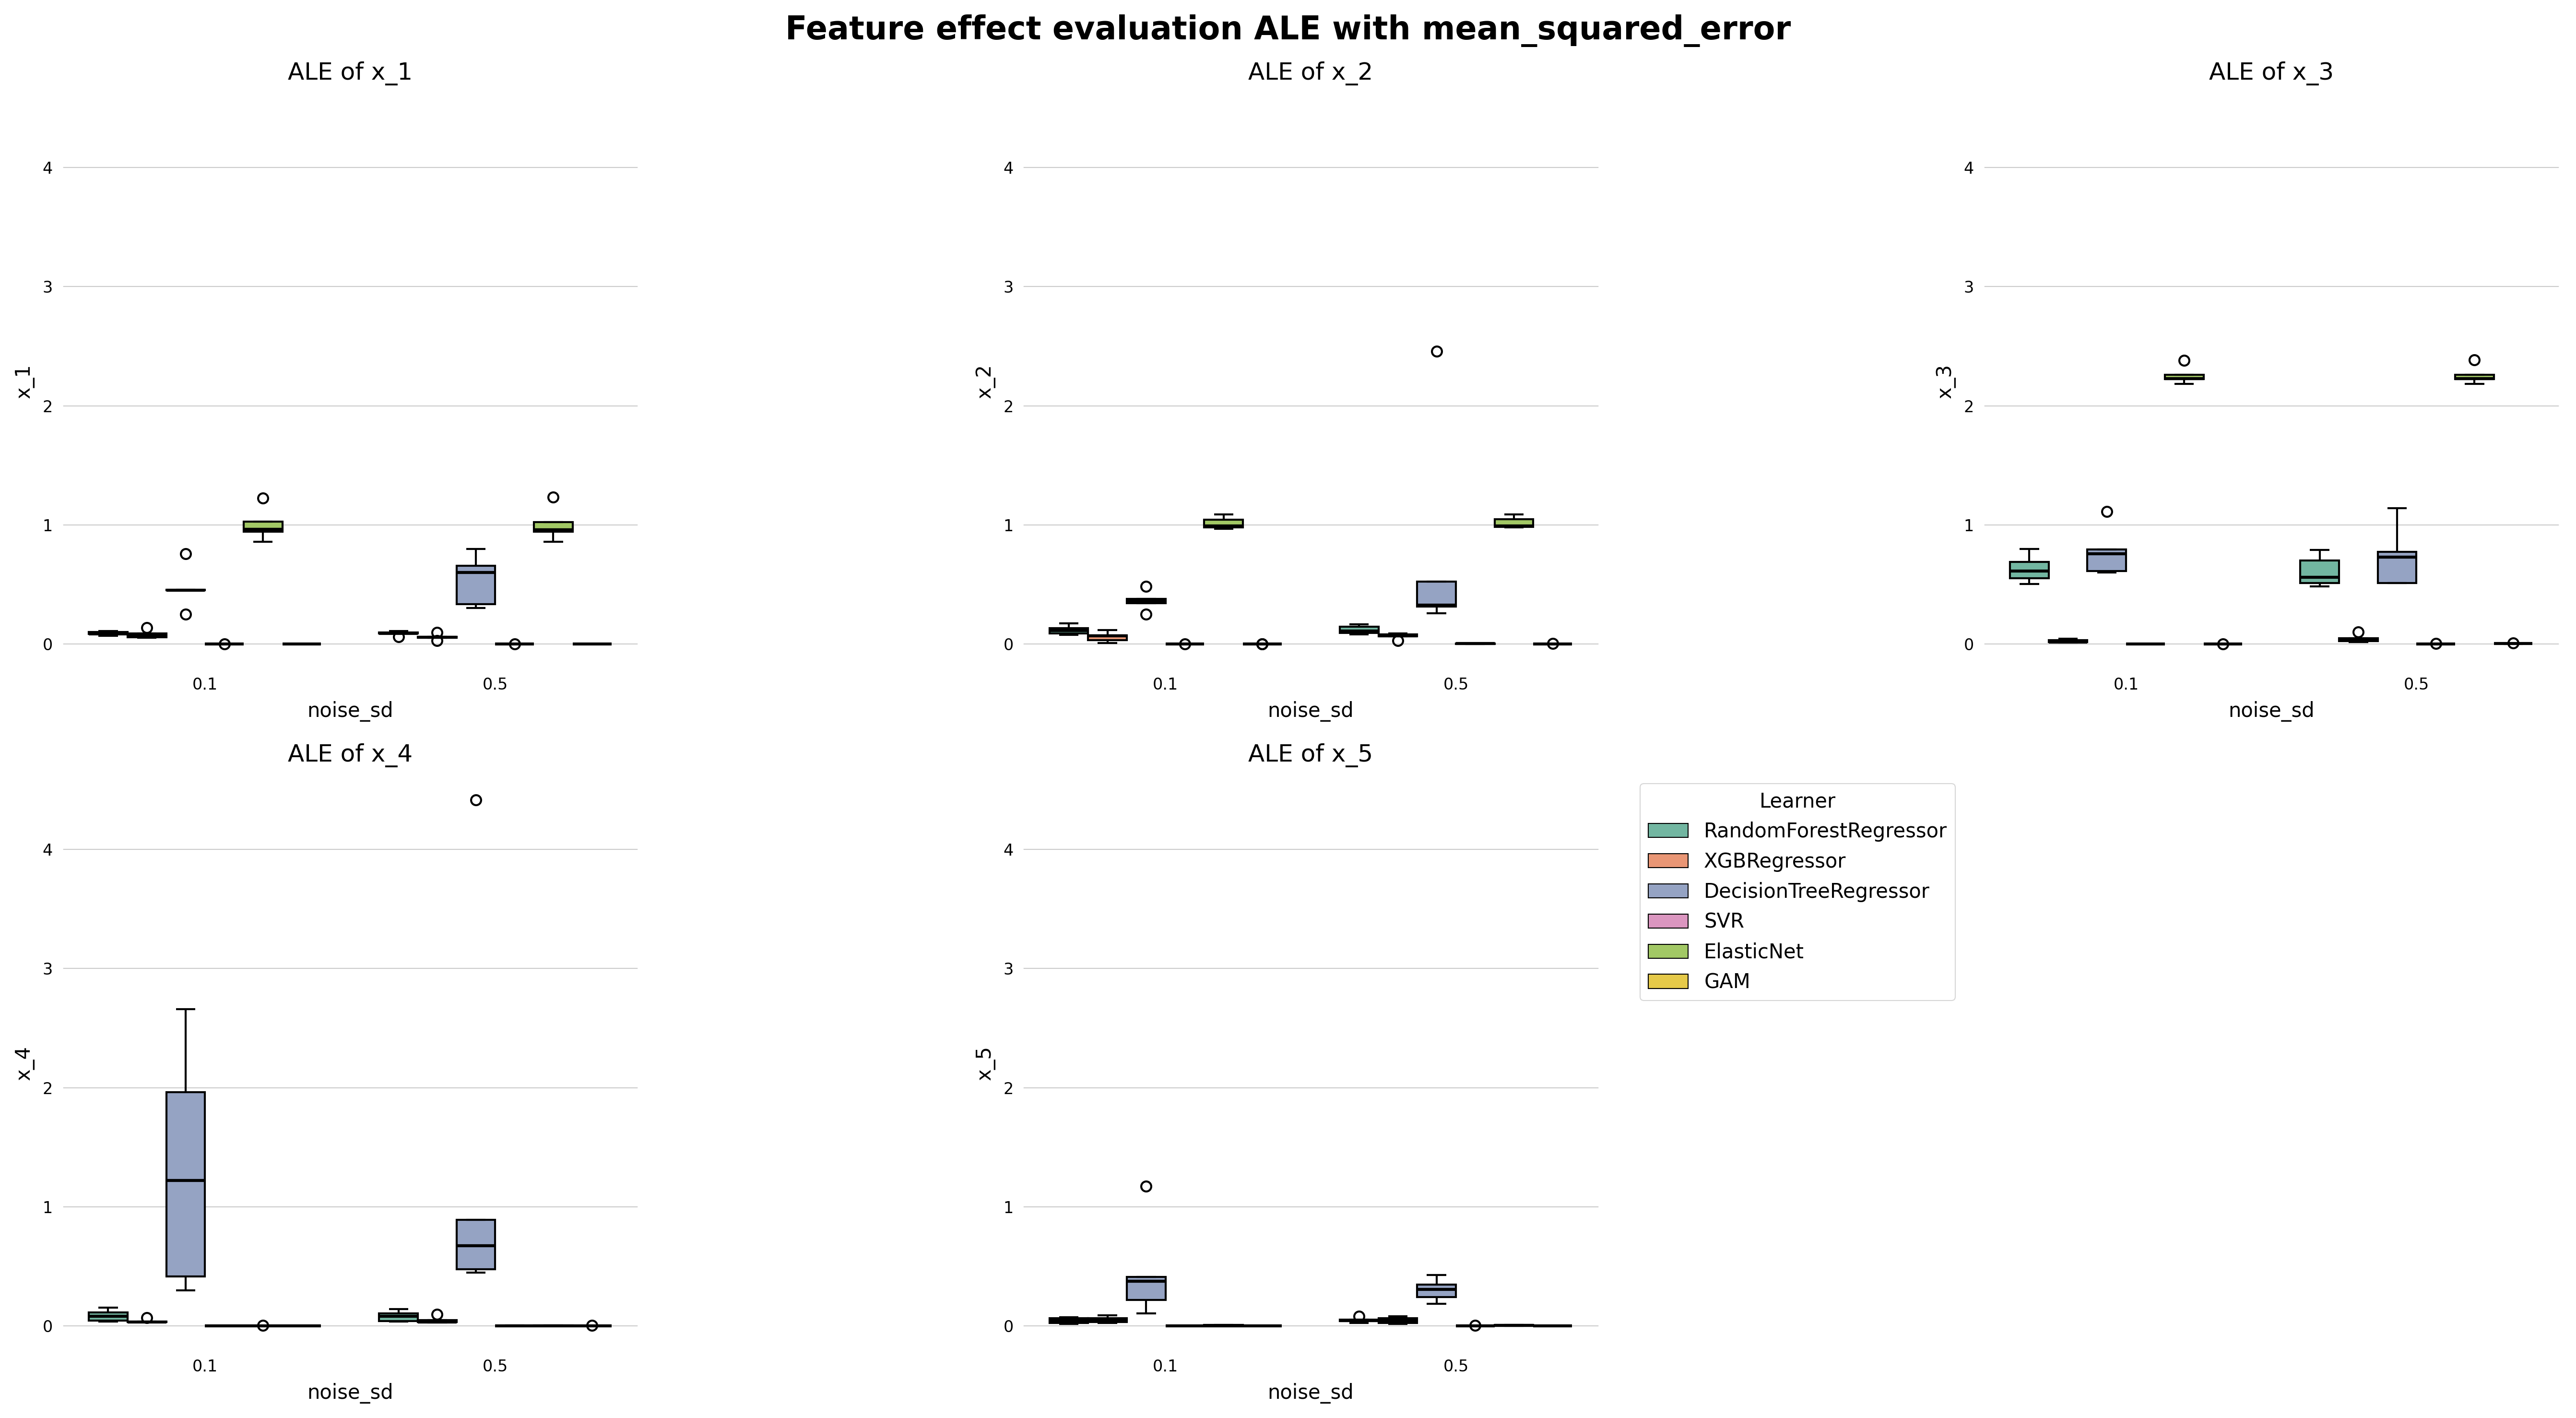

In [46]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4", "x_5"], df=df, effect_type="ALE");

### ALE example visualizations

(simulation no. 1 with n_train=1000 and noise_sd=0.1)

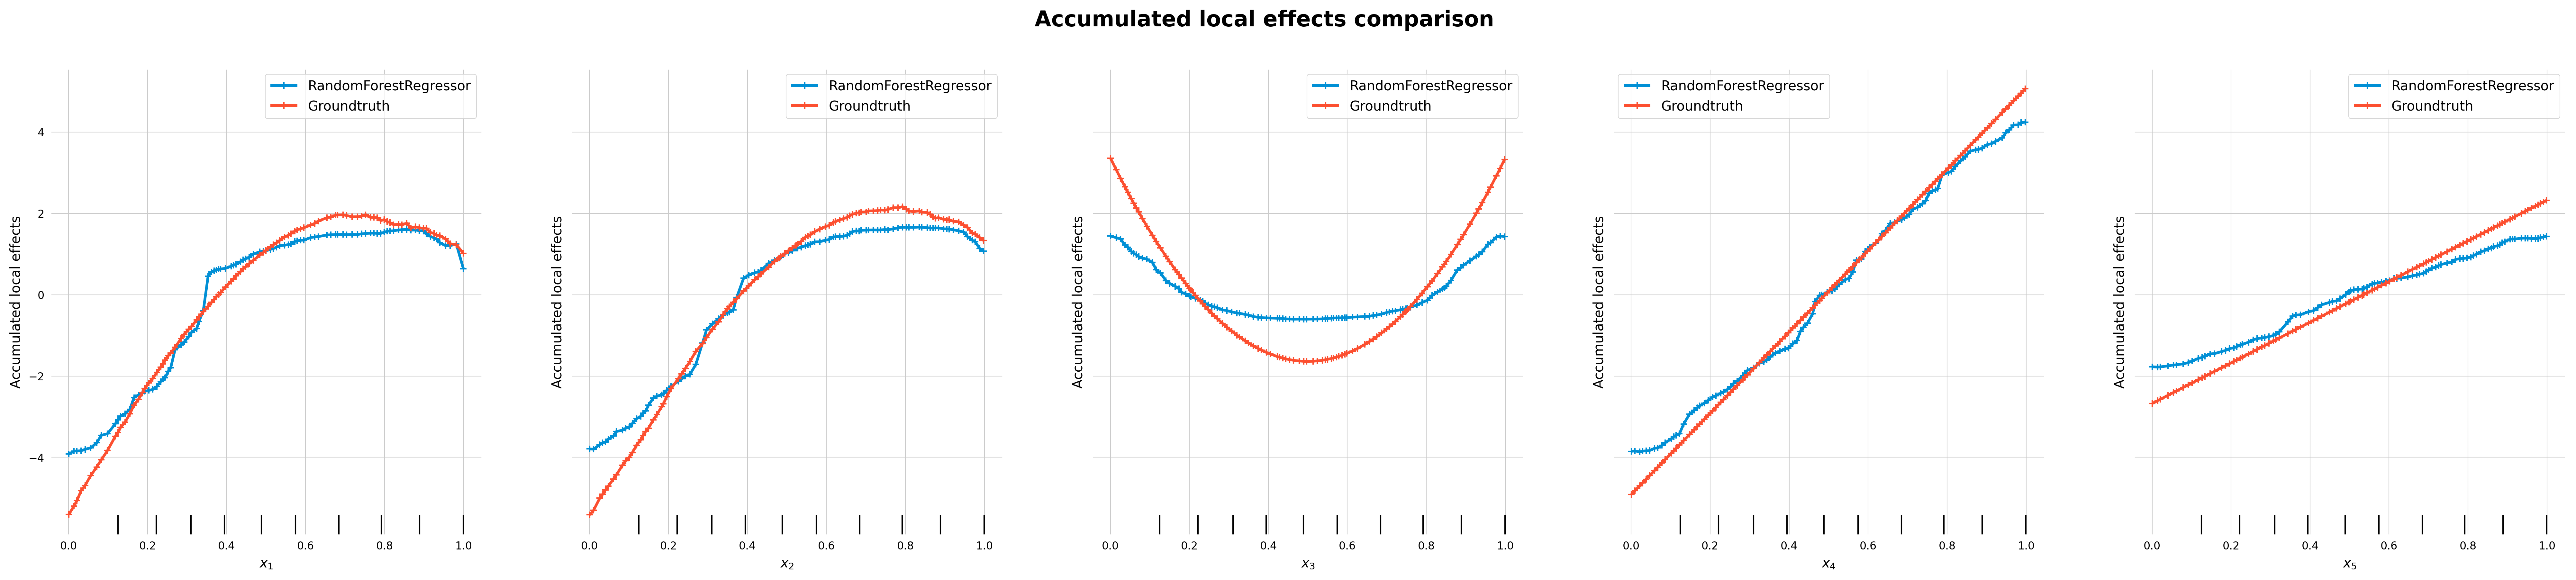

In [49]:
%matplotlib inline
plot_effect_comparison(rf, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="empirical", config=config);

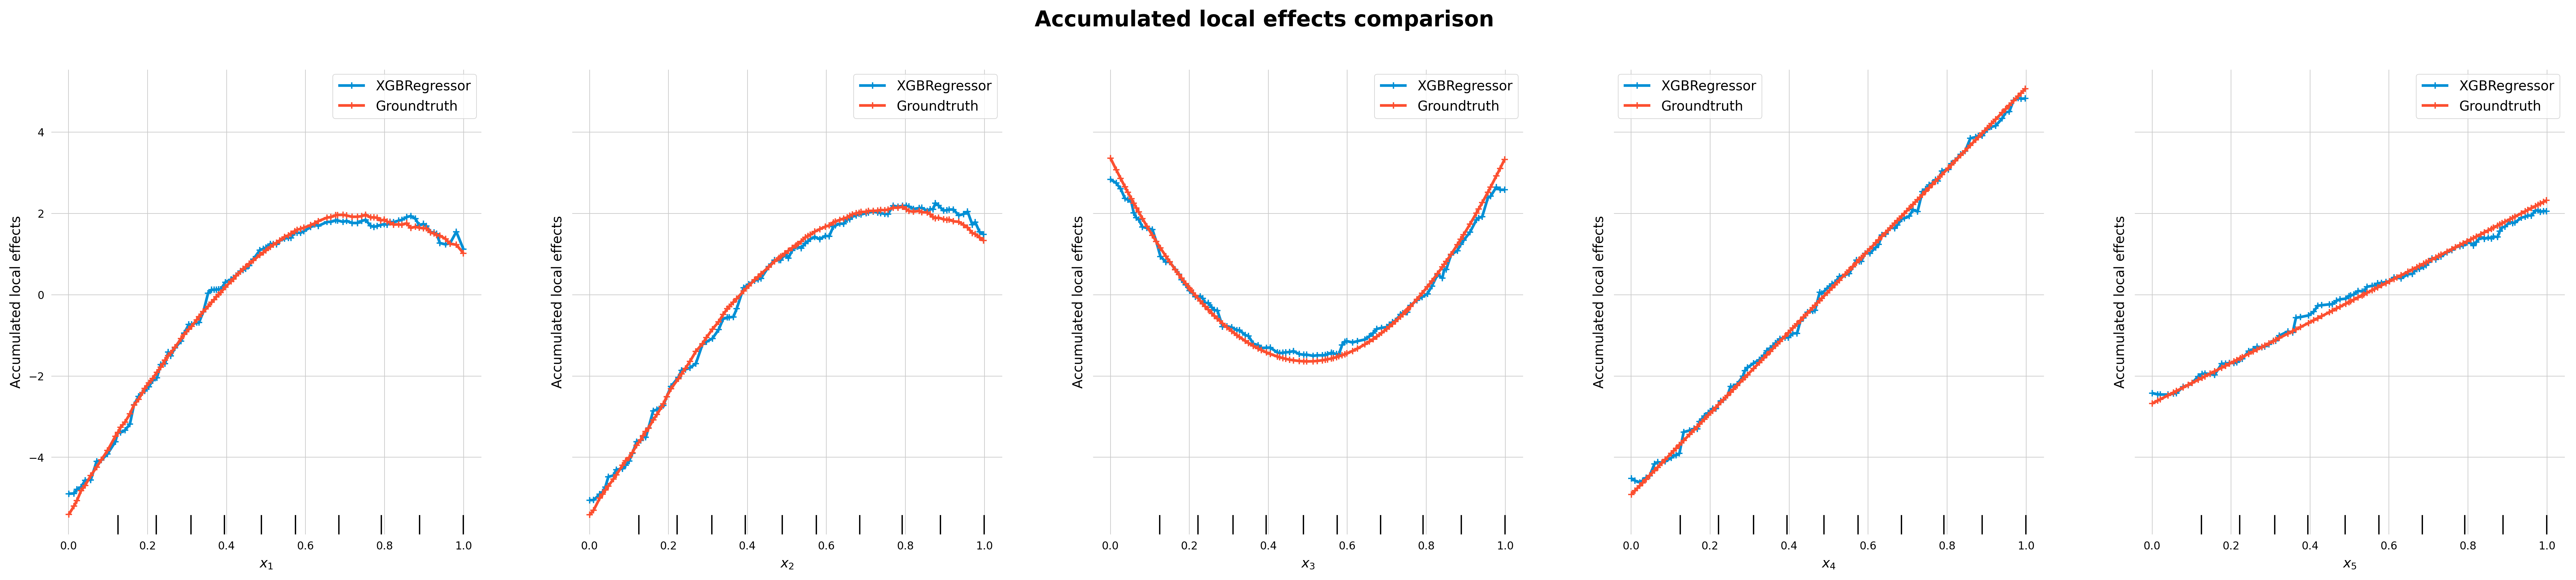

In [50]:
%matplotlib inline
plot_effect_comparison(xgb, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="empirical", config=config);

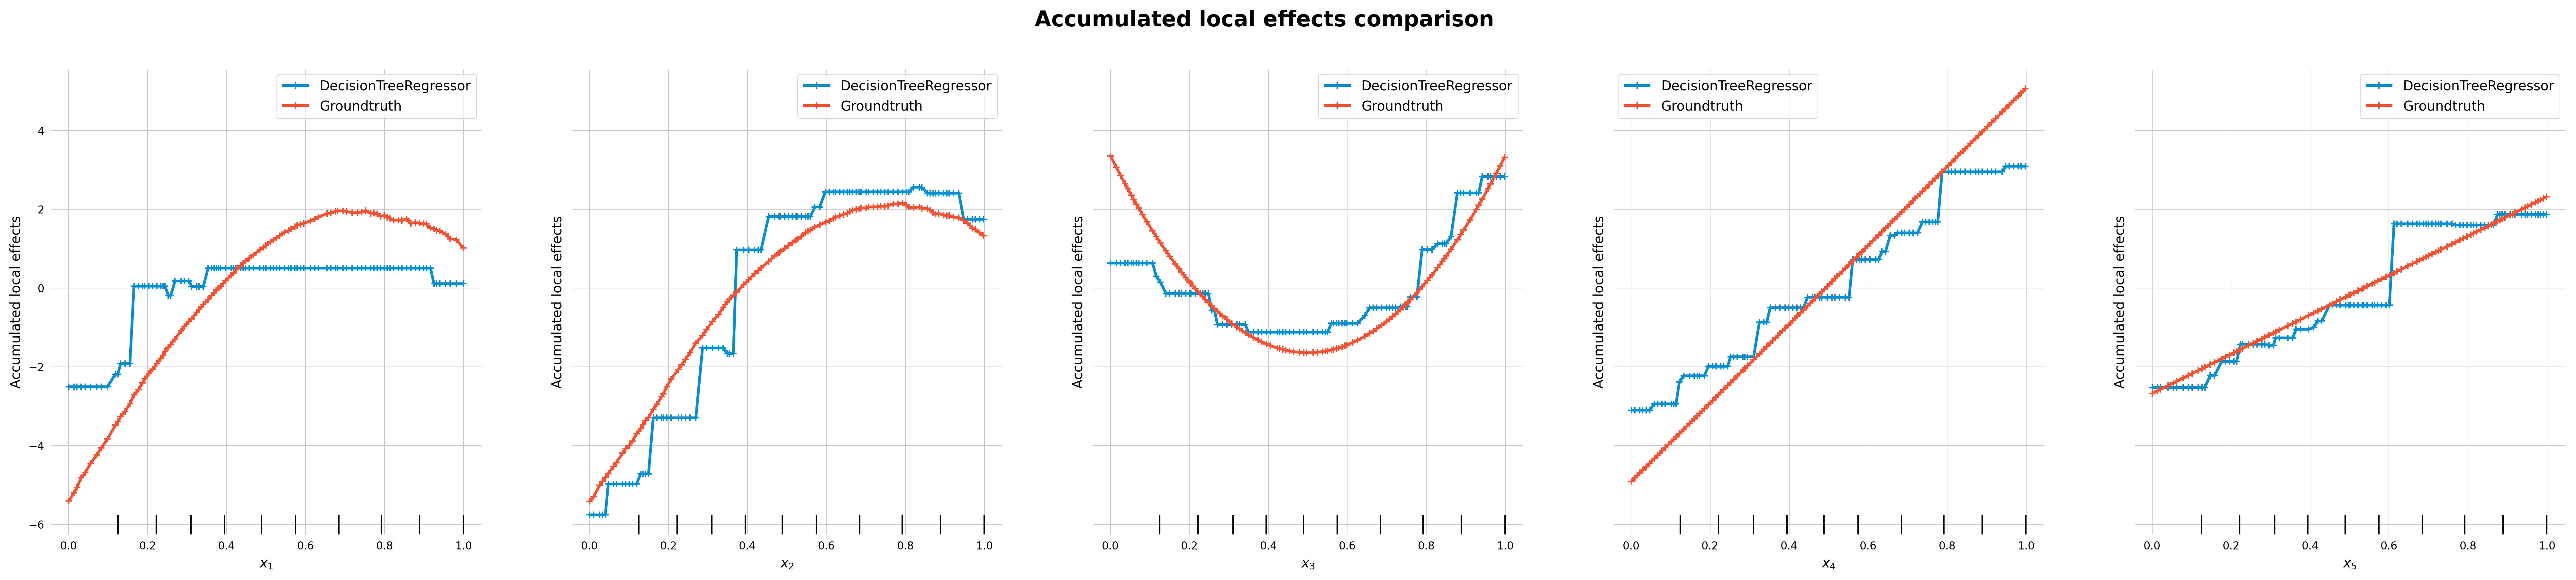

In [51]:
%matplotlib inline
plot_effect_comparison(tree, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="empirical", config=config);

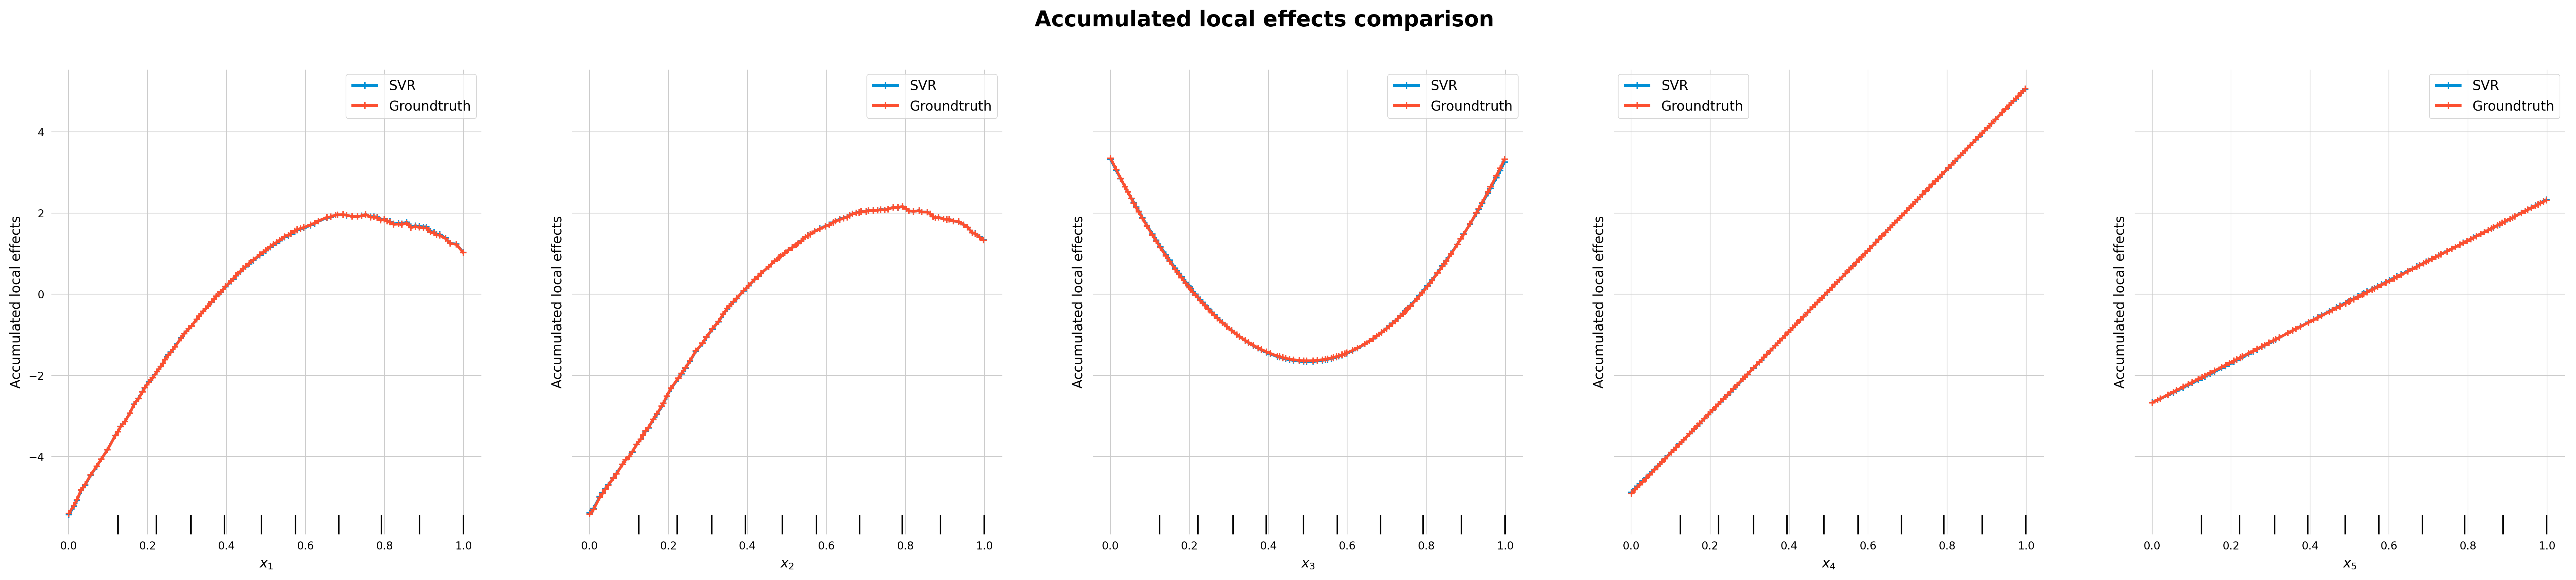

In [52]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="empirical", config=config);

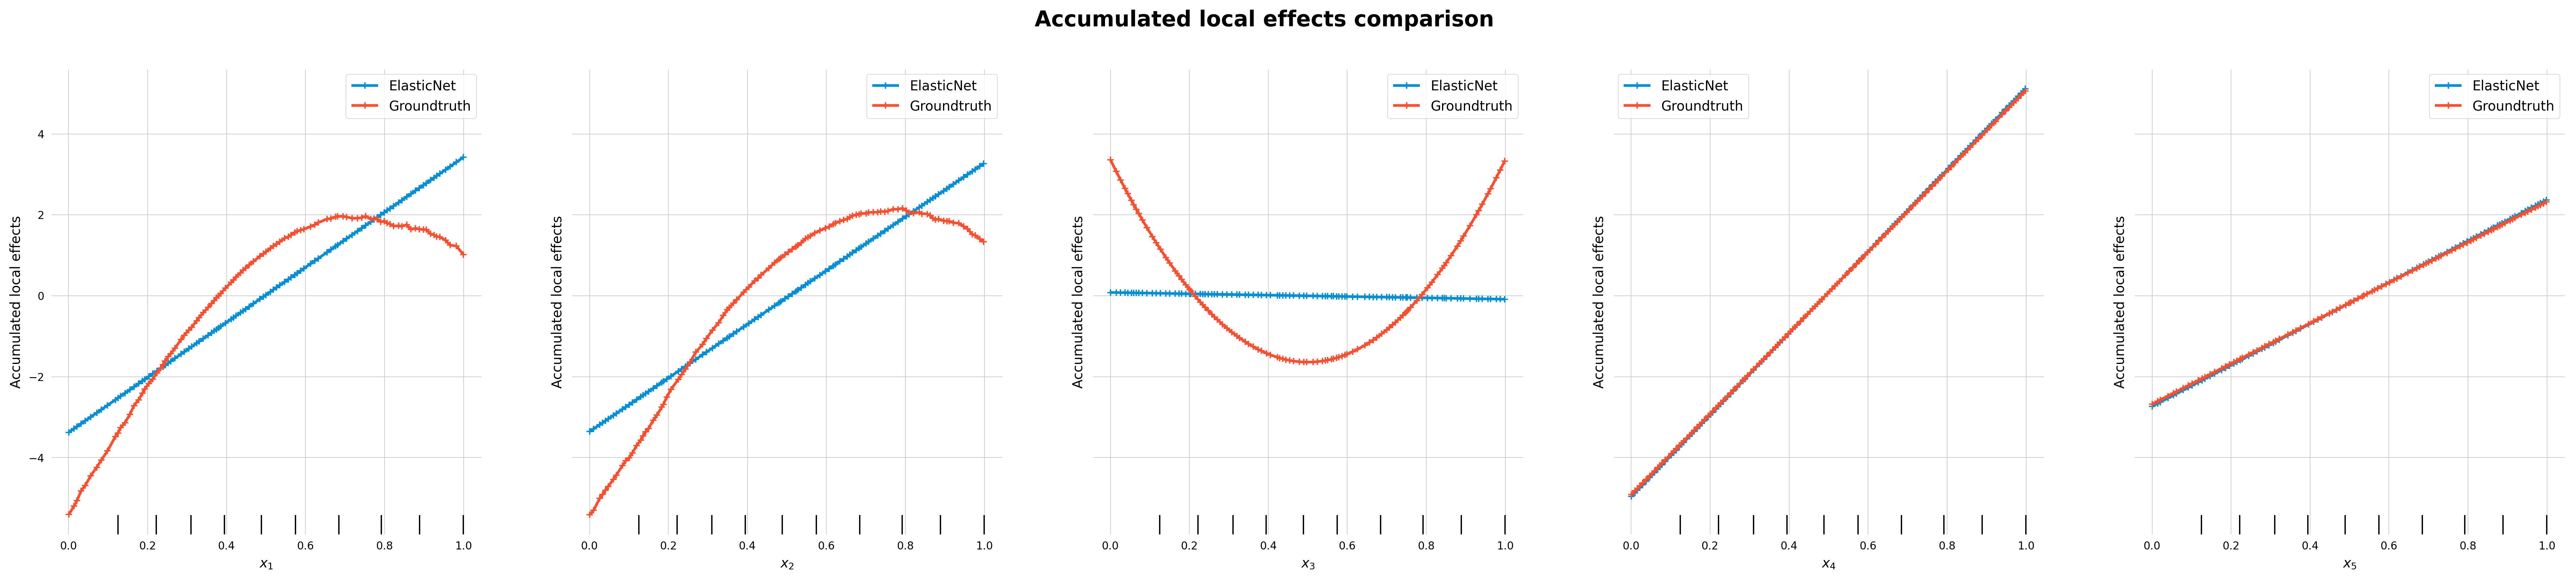

In [53]:
%matplotlib inline
plot_effect_comparison(elasticnet, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="empirical", config=config);

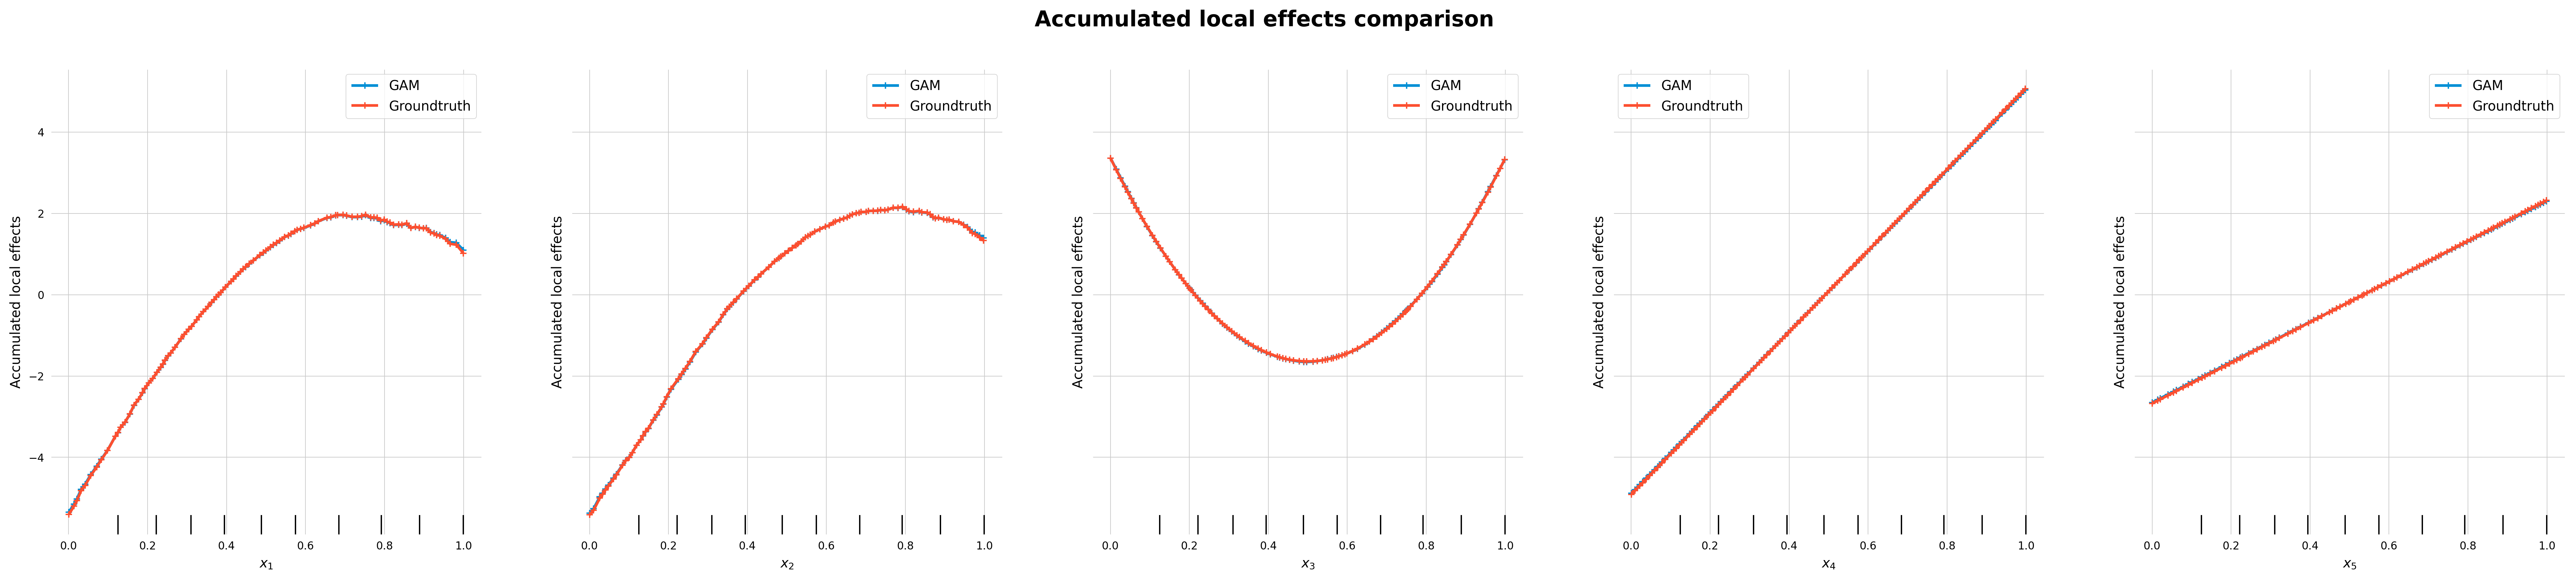

In [54]:
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="empirical", config=config);

## Open Questions

- number of simulation runs? (currently: 5; for more: server access?)
- size of training dataset? try several sizes? (currently: 1000)
- sensible values for noise param? (currently: 0.1, 0.5)
- how many grid points? how to choose grid? (currently: 100, equidistant)
- <b>how to compute true/theoretical groundtruth feature effect for ALE?</b>
- reason behind the difference between empirical and theoretical groundtruth feature effect? (possibly: sample mean of X deviates a little bit from theoretial expected value, leading to shift of the curves (if multiplied by e.g. 10 for $x_4$))

## Further Ideas

- different distributions for X to explore PDs/ALEs with less data in some areas
- use data with correlated features
- use other datasets (more real-world like datasets)
- warmstart tuning for better efficiency
- 2nd order effects / 2D feature effects
- analyse model error compared to error on pdps/ales - "correlation"?